## Pseudotime calculation using pySlingshot

- source: https://github.com/mossjacob/pyslingshot/blob/master/slingshot.ipynb 
- last updated: 8/1/2024




In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pyslingshot import Slingshot

import scanpy as sc
import anndata as ad

import os
# import re

In [ ]:
# # Step 1. Set up argument parsing
# parser = argparse.ArgumentParser(description="Run pySlingshot to compute pseudotime before in silico KO perturbation.")
# parser.add_argument("filepath", type=str, help="Path to the AnnData object with the preprocessed data.")
# parser.add_argument("data_id", type=str, help="Data identifier for the output files.")
# parser.add_argument("annotation", type=str, help="Annotation class for celltypes (clusters).")
# parser.add_argument("progenitor_cluster", type=str, help="Progenitor cluster to be used as the root for the pseudotime calculation.")
# parser.add_argument("embedding_key", type=str, help="Key for the embedding to be used for the pseudotime calculation.")
# parser.add_argument("figpath", type=str, help="Path to save the figures/plots for diagnostics purpose.")
# args = parser.parse_args()

In [5]:
# Step 1. define the input arguments
filepath = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/09_NMPs_subsetted_v2/"
data_id = "TDR126"
annotation = "manual_annotation"
progenitor_cluster = "NMPs"
embedding_key = "X_umap_aligned"
figpath = "figs/"

In [3]:
# Load the dataset
# adata = sc.read_h5ad(filepath + f"{data_id}.h5ad")
adata = sc.read_h5ad(filepath + f"{data_id}_nmps_manual_annotation.h5ad")
adata

# Assuming 'annotation' contains the categories as shown
try:
    categories = adata.obs[annotation].cat.categories
except:
    categories = adata.obs[annotation].unique()

In [4]:
adata

AnnData object with n_obs × n_vars = 4602 × 32057
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS_enrichment', 'TSS_percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'nCount_peaks_merged', 'nFeature_peaks_merged', 'SCT_weight', 'peaks_merged_weight', 'nCount_Gene_Activity', 'nFeature_Gene_Activity', 'nCount_peaks_integrated', 'nFeature_peaks_integrated', 'dataset', 'integrated_weight', 'peaks_integrated_weight', 'wsnn_res_0_8', 'seurat_clusters', 'data_source', 'annotation_ML', 'scANVI_zscape', 'annotation_ML_coarse', 'dev_stage', 'timepoints', 'manual_annotation'
    var: 'features'
    uns: 'annotation_ML_coarse_colors', 'annotation_ML_colors', 'dataset_colors', 'global_annotation_colors', 'log1p', 'scANVI_zscape_colors'
    obsm: 'X_umap.atac', 'X_umap.rna', 'X_umap_aligned', 'X_wnn.umap'

/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


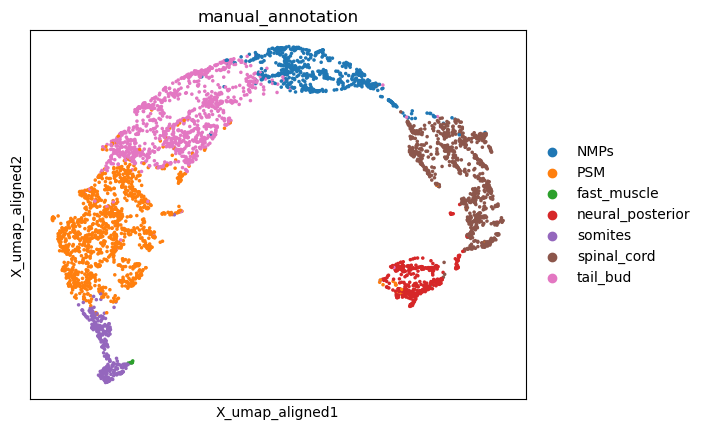

In [6]:
sc.pl.embedding(adata, basis="X_umap_aligned",color="manual_annotation")

In [7]:
# Create a dictionary mapping each category to an integer
category_to_integer = {category: i for i, category in enumerate(categories)}
# Print the mapping to verify
print(category_to_integer)

# Replace the categorical labels in the DataFrame with the mapped integers
new_annotation = annotation + "_integer"
adata.obs[new_annotation] = adata.obs[annotation].map(category_to_integer)

# Convert categorical labels to integer codes
try:
    adata.obs[new_annotation] = adata.obs[annotation].cat.codes
except:
    adata.obs[new_annotation] = adata.obs[annotation].astype('category').cat.codes

# Check the new column to ensure the mapping is correct and the datatype
print(adata.obs[new_annotation].head())
print(adata.obs[new_annotation].dtype)

{'NMPs': 0, 'PSM': 1, 'fast_muscle': 2, 'neural_posterior': 3, 'somites': 4, 'spinal_cord': 5, 'tail_bud': 6}
AAACAGCCAACACTTG-1_5    5
AAACAGCCACAATGCC-1_5    1
AAACAGCCACCTGGTG-1_5    3
AAACAGCCAGTTATCG-1_5    0
AAACATGCAAACTGCC-1_5    1
Name: manual_annotation_integer, dtype: int8
int8


/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/util.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isint(cluster_labels[0]):


Lineages: [Lineage[0, 5, 3], Lineage[0, 6, 1, 4, 2]]


  0%|          | 0/1 [00:00<?, ?it/s]

/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/slingshot.py:333: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D


Reversing from leaf to root
Averaging branch @0 with lineages: [0, 1] [<pcurvepy2.pcurve.PrincipalCurve object at 0x151e936c7fa0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x151e936c7eb0>]
Shrinking branch @0 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x151e936c7fa0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x151e936c7eb0>]


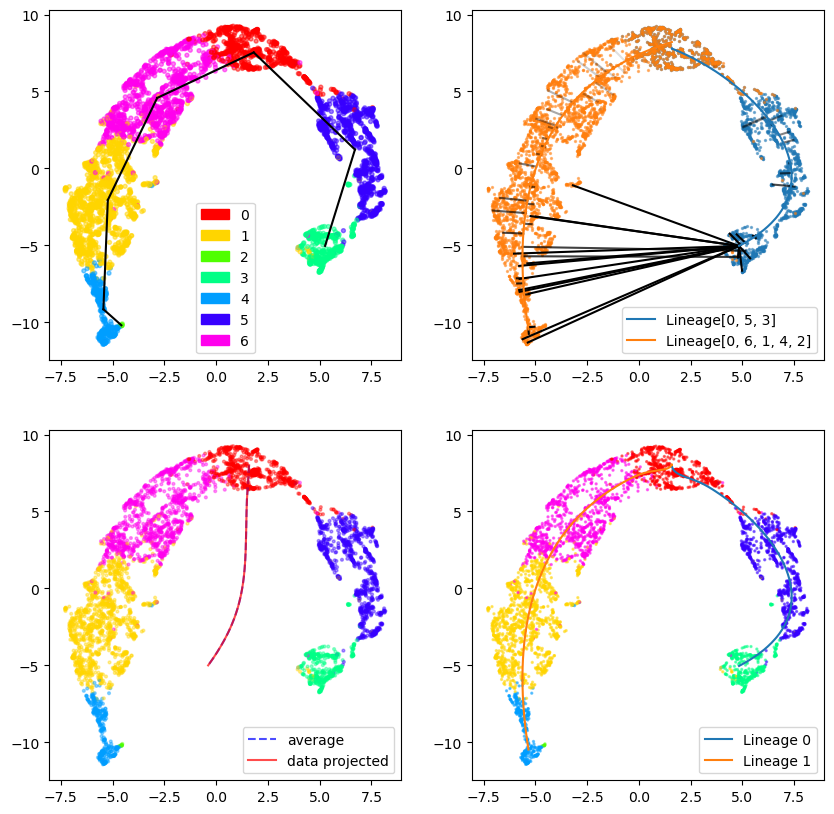

In [11]:
os.makedirs(filepath + figpath, exist_ok=True)

# Run pySlingshot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
custom_xlim = (-12, 12)
custom_ylim = (-12, 12)
# plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)

# define the progenitor_cluster
progenitor_cluster_int = category_to_integer[progenitor_cluster]

slingshot = Slingshot(adata, celltype_key=new_annotation, 
                      obsm_key=embedding_key, start_node=progenitor_cluster_int, 
                      debug_level='verbose')

slingshot.fit(num_epochs=1, debug_axes=axes)

fig.savefig(filepath + figpath + f"{data_id}_pyslingshot_pseudotime_run.png")

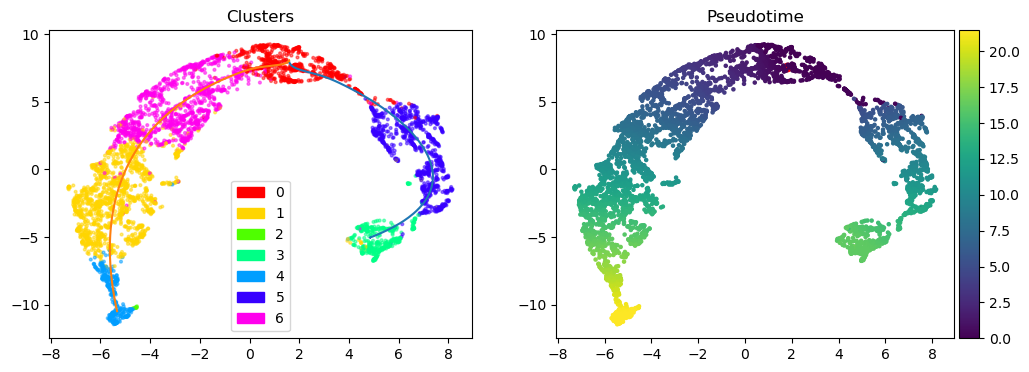

In [12]:
# Additional pseudotime plots
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].set_title('Clusters')
axes[1].set_title('Pseudotime')
slingshot.plotter.curves(axes[0], slingshot.curves)
slingshot.plotter.clusters(axes[0], labels=np.arange(slingshot.num_clusters), s=4, alpha=0.5)
slingshot.plotter.clusters(axes[1], color_mode='pseudotime', s=5)
fig.savefig(filepath + figpath + f"{data_id}_pyslingshot_pseudotime.png")

In [13]:
# Save the pseudotime values to the dataframe
# NOTE: the Slingshot class has a property which has the pseudotime that is used to 
# color the plot above
pseudotime = slingshot.unified_pseudotime
pseudotime

# if there's already "Pseudotime" column, then replace it with the new one.
if "Pseudotime" in adata.obs.columns:
    # move the "Pseudotime" to "Pseudotime_DPT
    adata.obs["Pseudotime_DPT"] = adata.obs["Pseudotime"]
    adata.obs["Pseudotime"] = pseudotime
else:
    adata.obs["Pseudotime"] = pseudotime
    
# add the columns for lineages (mesoderm/neuroectoderm) - used later in CellOracle
Lineage_Meso = ["NMPs","tail_bud","PSM","somites","fast_muscle"]
Lineage_NeuroEcto = ["NMPs", "spinal_cord", "neural_posterior"]

adata.obs["Lineage_Meso"] = adata.obs[annotation].isin(Lineage_Meso)
adata.obs["Lineage_NeuroEcto"] = adata.obs[annotation].isin(Lineage_NeuroEcto)

# Fill in Pseudotime for Lineage_Meso where Lineage_Meso is True
adata.obs['Pseudotime_Lineage_Meso'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_Meso'], np.nan)

# Fill in Pseudotime for Lineage_NeuroEcto where Lineage_NeuroEcto is True
adata.obs['Pseudotime_Lineage_NeuroEcto'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_NeuroEcto'], np.nan)

# save the adata.obs as a dataframe (csv file) for further analysis
adata.obs.to_csv(filepath + f"{data_id}_slingshot.csv")

### test completed 

The scripted version is here: ../scripts/run_06_pyslingshot_compute_pseudotime.py



## Next steps:

- we ran slurm jobs to compute pyslingshot-pseudotime for all individual adata objects (TDR126-TDR124)

- TDR118 and TDR124 seemed to be mis-computed with their lineage directions

In [19]:
adata

AnnData object with n_obs × n_vars = 3363 × 32057
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS_enrichment', 'TSS_percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'nCount_peaks_merged', 'nFeature_peaks_merged', 'SCT_weight', 'peaks_merged_weight', 'nCount_Gene_Activity', 'nFeature_Gene_Activity', 'nCount_peaks_integrated', 'nFeature_peaks_integrated', 'dataset', 'integrated_weight', 'peaks_integrated_weight', 'wsnn_res_0_8', 'seurat_clusters', 'data_source', 'annotation_ML', 'scANVI_zscape', 'annotation_ML_coarse', 'dev_stage', 'timepoints', 'manual_annotation', 'manual_annotation_integer', 'Pseudotime', 'Lineage_Meso', 'Lineage_NeuroEcto', 'Pseudotime_Lineage_Meso', 'Pseudotime_Lineage_NeuroEcto'
    var: 'features'
    uns: 'annotation_ML_coarse_colors', 'annotation_ML_colors', 'dataset

/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


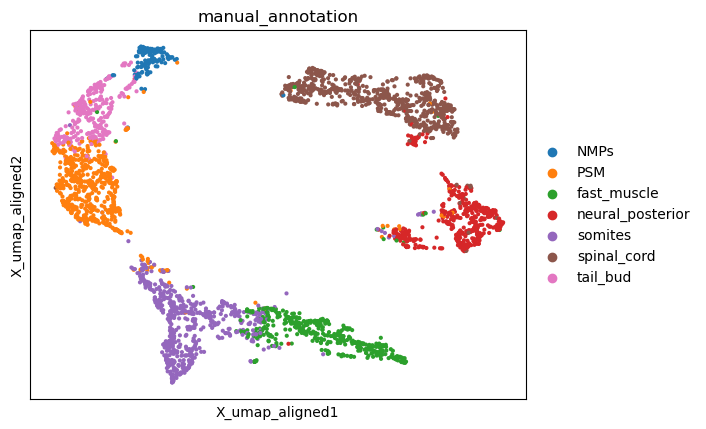

/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


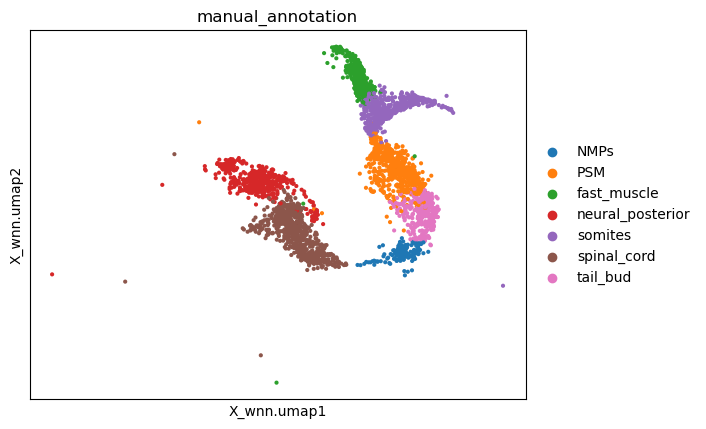

/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/util.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isint(cluster_labels[0]):


{'NMPs': 0, 'PSM': 1, 'fast_muscle': 2, 'neural_posterior': 3, 'somites': 4, 'spinal_cord': 5, 'tail_bud': 6}
AAACATGCAAACTCAT-1_1    5
AAACATGCAGGACCTT-1_1    1
AAACCAACAGCAGGTA-1_1    5
AAACCAACATGTCAAT-1_1    5
AAACCGAAGGATGATG-1_1    2
Name: manual_annotation_integer, dtype: int8
int8
Lineages: [Lineage[0, 5, 3], Lineage[0, 6, 1, 4, 2]]


  0%|          | 0/1 [00:00<?, ?it/s]

/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/slingshot.py:333: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D


Reversing from leaf to root
Averaging branch @0 with lineages: [0, 1] [<pcurvepy2.pcurve.PrincipalCurve object at 0x151e71a41120>, <pcurvepy2.pcurve.PrincipalCurve object at 0x151e71a41270>]
Shrinking branch @0 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x151e71a41120>, <pcurvepy2.pcurve.PrincipalCurve object at 0x151e71a41270>]


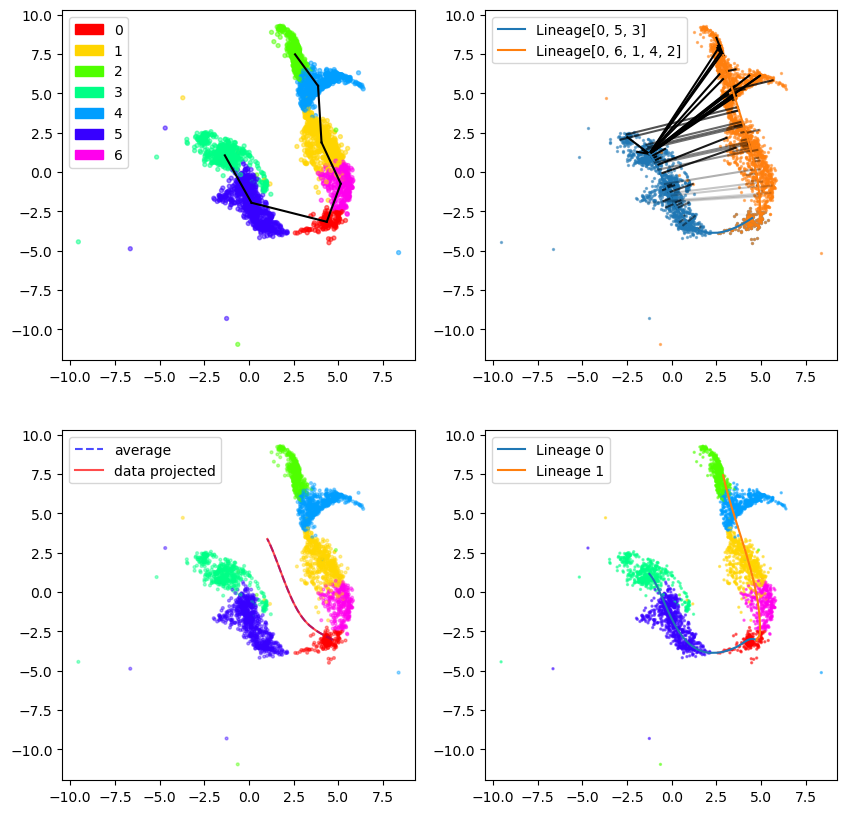

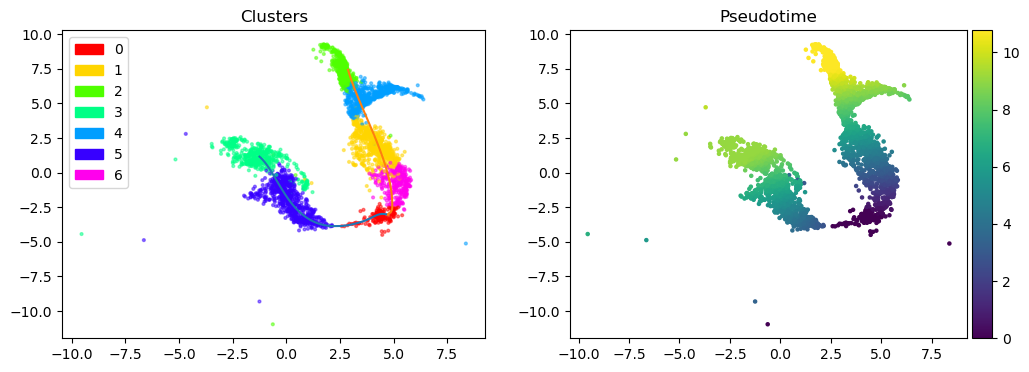

In [22]:
# TDR118

# Assign arguments to variables
# filepath = ""
data_id = "TDR118"
annotation_class = "manual_annotation"
progenitor_cluster = "NMPs" #args.progenitor_cluster
# embedding_key = "X_umap_aligned" #args.embedding_key
embedding_key = "X_wnn.umap"
 
# Load the dataset
# adata = sc.read_h5ad(filepath + f"{data_id}.h5ad")
adata = sc.read_h5ad(filepath + f"{data_id}_nmps_manual_annotation.h5ad")
adata

sc.pl.embedding(adata, basis="X_umap_aligned",color="manual_annotation")
sc.pl.embedding(adata, basis=embedding_key, color="manual_annotation")

# Assuming 'annotation' contains the categories as shown
try:
    categories = adata.obs[annotation].cat.categories
except:
    categories = adata.obs[annotation].unique()

# Create a dictionary mapping each category to an integer
category_to_integer = {category: i for i, category in enumerate(categories)}
# Print the mapping to verify
print(category_to_integer)

# Replace the categorical labels in the DataFrame with the mapped integers
new_annotation = annotation + "_integer"
adata.obs[new_annotation] = adata.obs[annotation].map(category_to_integer)

# Convert categorical labels to integer codes
try:
    adata.obs[new_annotation] = adata.obs[annotation].cat.codes
except:
    adata.obs[new_annotation] = adata.obs[annotation].astype('category').cat.codes

# Check the new column to ensure the mapping is correct and the datatype
print(adata.obs[new_annotation].head())
print(adata.obs[new_annotation].dtype)

# Run pySlingshot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
custom_xlim = (-12, 12)
custom_ylim = (-12, 12)
# plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)

# define the progenitor_cluster
progenitor_cluster_int = category_to_integer[progenitor_cluster]

slingshot = Slingshot(adata, celltype_key=new_annotation, 
                      obsm_key=embedding_key, start_node=progenitor_cluster_int, 
                      debug_level='verbose')

slingshot.fit(num_epochs=1, debug_axes=axes)

fig.savefig(filepath + figpath + f"{data_id}_pyslingshot_pseudotime_run.png")

# Additional pseudotime plots
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].set_title('Clusters')
axes[1].set_title('Pseudotime')
slingshot.plotter.curves(axes[0], slingshot.curves)
slingshot.plotter.clusters(axes[0], labels=np.arange(slingshot.num_clusters), s=4, alpha=0.5)
slingshot.plotter.clusters(axes[1], color_mode='pseudotime', s=5)
fig.savefig(filepath + figpath + f"{data_id}_pyslingshot_pseudotime.png")

# Save the pseudotime values to the dataframe
# NOTE: the Slingshot class has a property which has the pseudotime that is used to 
# color the plot above
pseudotime = slingshot.unified_pseudotime
pseudotime

# if there's already "Pseudotime" column, then replace it with the new one.
if "Pseudotime" in adata.obs.columns:
    # move the "Pseudotime" to "Pseudotime_DPT
    adata.obs["Pseudotime_DPT"] = adata.obs["Pseudotime"]
    adata.obs["Pseudotime"] = pseudotime
else:
    adata.obs["Pseudotime"] = pseudotime


# add the columns for lineages (mesoderm/neuroectoderm) - used later in CellOracle
Lineage_Meso = ["NMPs","tail_bud","PSM","somites","fast_muscle"]
Lineage_NeuroEcto = ["NMPs", "spinal_cord", "neural_posterior"]

adata.obs["Lineage_Meso"] = adata.obs[annotation].isin(Lineage_Meso)
adata.obs["Lineage_NeuroEcto"] = adata.obs[annotation].isin(Lineage_NeuroEcto)

# Fill in Pseudotime for Lineage_Meso where Lineage_Meso is True
adata.obs['Pseudotime_Lineage_Meso'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_Meso'], np.nan)

# Fill in Pseudotime for Lineage_NeuroEcto where Lineage_NeuroEcto is True
adata.obs['Pseudotime_Lineage_NeuroEcto'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_NeuroEcto'], np.nan)

# save the adata.obs as a dataframe (csv file) for further analysis
adata.obs.to_csv(filepath + f"{data_id}_slingshot.csv")

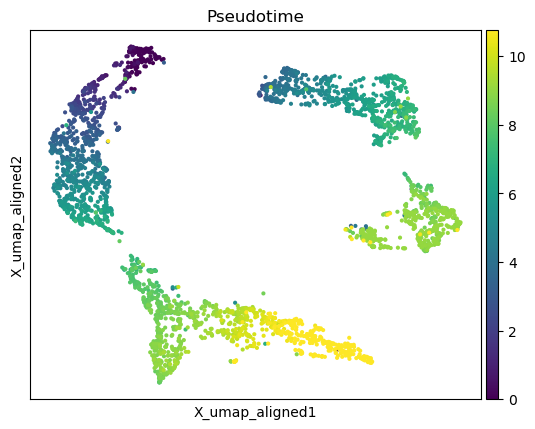

In [23]:
sc.pl.embedding(adata, basis="X_umap_aligned", color="Pseudotime")

In [27]:
manual_anno

manual_annotation_v2
AAACAGCCAATATAGG-1_3              somites
AAACAGCCATTGACAT-1_3     neural_posterior
AAACATGCAGTTATCG-1_3     neural_posterior
AAACCAACAAACCCTA-1_3              somites
AAACCGAAGTGTGATC-1_3          spinal_cord
...                                   ...
TTTGCGACACCAAAGG-1_3          spinal_cord
TTTGTCCCATTAGGTT-1_3          spinal_cord
TTTGTCCCATTGTCCT-1_3     neural_posterior
TTTGTGGCATAGCGGA-1_3          fast_muscle
TTTGTGTTCATCAGTA-1_3          spinal_cord

[1244 rows x 1 columns]

/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


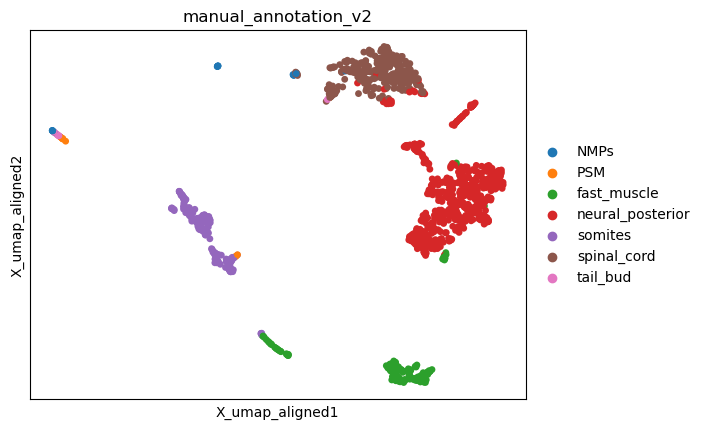

/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


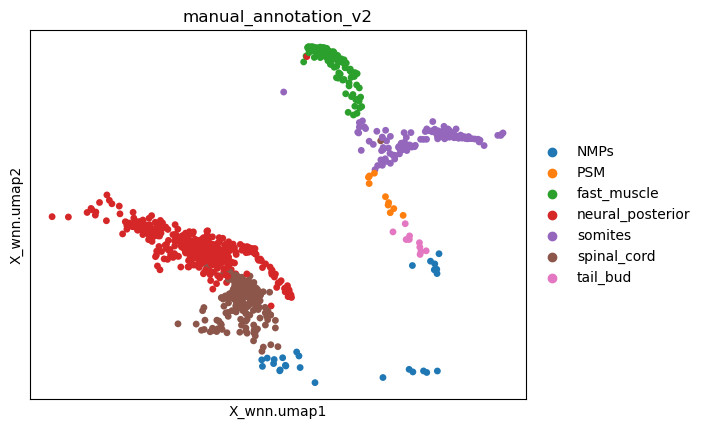

/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/util.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isint(cluster_labels[0]):


{'NMPs': 0, 'PSM': 1, 'fast_muscle': 2, 'neural_posterior': 3, 'somites': 4, 'spinal_cord': 5, 'tail_bud': 6}
AAACAGCCAATATAGG-1_3    4
AAACAGCCATTGACAT-1_3    3
AAACATGCAGTTATCG-1_3    3
AAACCAACAAACCCTA-1_3    4
AAACCGAAGTGTGATC-1_3    5
Name: manual_annotation_integer, dtype: int8
int8
Lineages: [Lineage[0, 5, 3], Lineage[0, 6, 1, 4, 2]]


  0%|          | 0/1 [00:00<?, ?it/s]

/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/slingshot.py:333: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D


Reversing from leaf to root
Averaging branch @0 with lineages: [0, 1] [<pcurvepy2.pcurve.PrincipalCurve object at 0x151e5d27fdc0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x151e5d27fdf0>]
Shrinking branch @0 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x151e5d27fdc0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x151e5d27fdf0>]


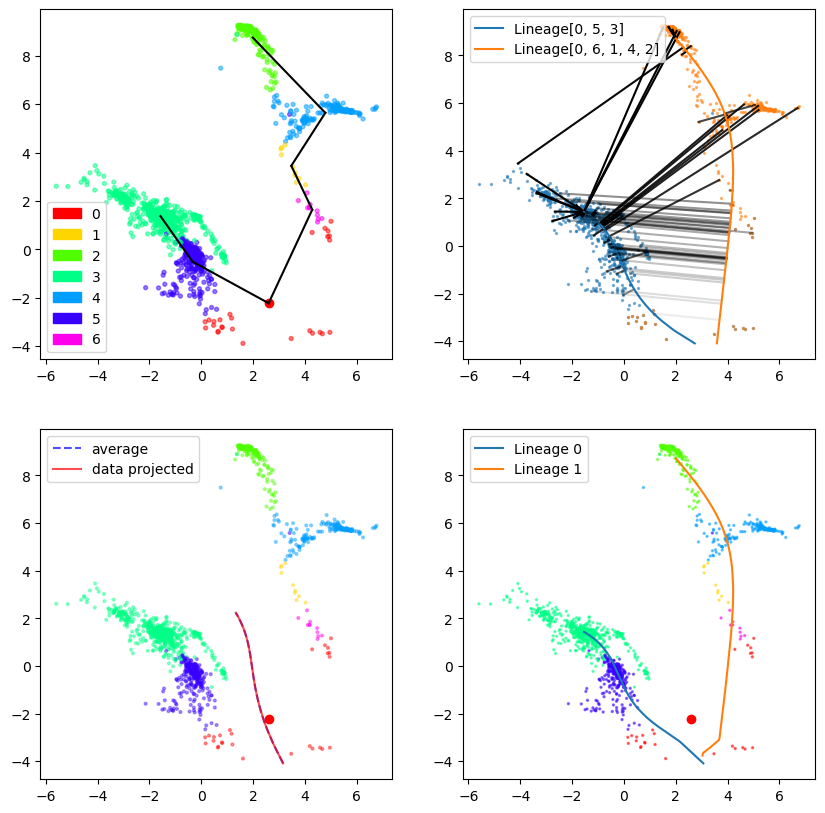

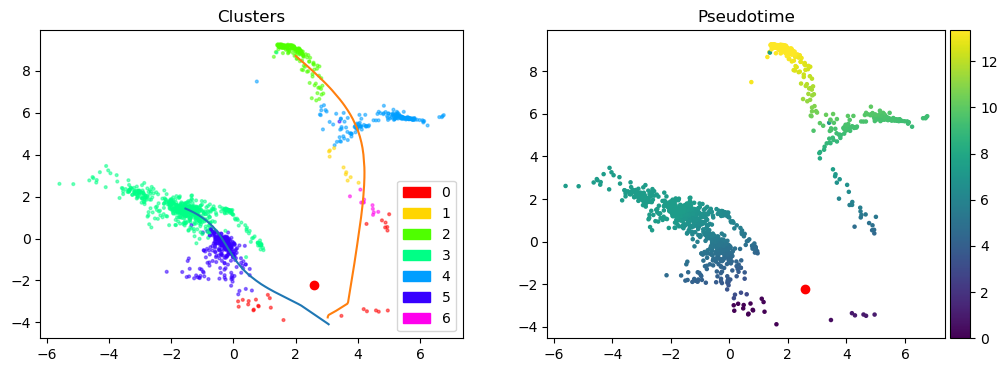

In [28]:
# TDR124

# import the manual_annotation done for computing pseudotime trajectories
manual_anno = pd.read_csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/09_NMPs_subsetted_v2/TDR124_manual_anno_PT.txt",
                          sep="\t",index_col=0)
manual_anno

# Assign arguments to variables
# filepath = ""
data_id = "TDR124"
annotation_class = "manual_annotation_v2"
progenitor_cluster = "NMPs"
# embedding_key = "X_umap_aligned"
embedding_key = "X_wnn.umap"
 
# Load the dataset
# adata = sc.read_h5ad(filepath + f"{data_id}.h5ad")
adata = sc.read_h5ad(filepath + f"{data_id}_nmps_manual_annotation.h5ad")
adata

adata.obs["manual_annotation_v2"] = manual_anno["manual_annotation_v2"]

sc.pl.embedding(adata, basis="X_umap_aligned",color="manual_annotation_v2")
sc.pl.embedding(adata, basis=embedding_key, color="manual_annotation_v2")

# Assuming 'annotation' contains the categories as shown
try:
    categories = adata.obs[annotation].cat.categories
except:
    categories = adata.obs[annotation].unique()

# Create a dictionary mapping each category to an integer
category_to_integer = {category: i for i, category in enumerate(categories)}
# Print the mapping to verify
print(category_to_integer)

# Replace the categorical labels in the DataFrame with the mapped integers
new_annotation = annotation + "_integer"
adata.obs[new_annotation] = adata.obs[annotation_class].map(category_to_integer)

# Convert categorical labels to integer codes
try:
    adata.obs[new_annotation] = adata.obs[annotation_class].cat.codes
except:
    adata.obs[new_annotation] = adata.obs[annotation_class].astype('category').cat.codes

# Check the new column to ensure the mapping is correct and the datatype
print(adata.obs[new_annotation].head())
print(adata.obs[new_annotation].dtype)

# Run pySlingshot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
custom_xlim = (-12, 12)
custom_ylim = (-12, 12)
# plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)

# define the progenitor_cluster
progenitor_cluster_int = category_to_integer[progenitor_cluster]

slingshot = Slingshot(adata, celltype_key=new_annotation, 
                      obsm_key=embedding_key, start_node=progenitor_cluster_int, 
                      debug_level='verbose')

slingshot.fit(num_epochs=1, debug_axes=axes)

fig.savefig(filepath + figpath + f"{data_id}_pyslingshot_pseudotime_run.png")

# Additional pseudotime plots
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].set_title('Clusters')
axes[1].set_title('Pseudotime')
slingshot.plotter.curves(axes[0], slingshot.curves)
slingshot.plotter.clusters(axes[0], labels=np.arange(slingshot.num_clusters), s=4, alpha=0.5)
slingshot.plotter.clusters(axes[1], color_mode='pseudotime', s=5)
fig.savefig(filepath + figpath + f"{data_id}_pyslingshot_pseudotime.png")

# Save the pseudotime values to the dataframe
# NOTE: the Slingshot class has a property which has the pseudotime that is used to 
# color the plot above
pseudotime = slingshot.unified_pseudotime
pseudotime

# if there's already "Pseudotime" column, then replace it with the new one.
if "Pseudotime" in adata.obs.columns:
    # move the "Pseudotime" to "Pseudotime_DPT
    adata.obs["Pseudotime_DPT"] = adata.obs["Pseudotime"]
    adata.obs["Pseudotime"] = pseudotime
else:
    adata.obs["Pseudotime"] = pseudotime


# add the columns for lineages (mesoderm/neuroectoderm) - used later in CellOracle
Lineage_Meso = ["NMPs","tail_bud","PSM","somites","fast_muscle"]
Lineage_NeuroEcto = ["NMPs", "spinal_cord", "neural_posterior"]

adata.obs["Lineage_Meso"] = adata.obs[annotation].isin(Lineage_Meso)
adata.obs["Lineage_NeuroEcto"] = adata.obs[annotation].isin(Lineage_NeuroEcto)

# Fill in Pseudotime for Lineage_Meso where Lineage_Meso is True
adata.obs['Pseudotime_Lineage_Meso'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_Meso'], np.nan)

# Fill in Pseudotime for Lineage_NeuroEcto where Lineage_NeuroEcto is True
adata.obs['Pseudotime_Lineage_NeuroEcto'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_NeuroEcto'], np.nan)

# save the adata.obs as a dataframe (csv file) for further analysis
adata.obs.to_csv(filepath + f"{data_id}_slingshot.csv")

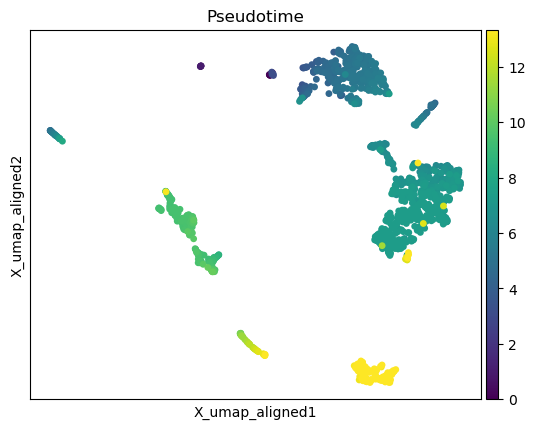

In [29]:
sc.pl.embedding(adata, basis="X_umap_aligned", color="Pseudotime")

/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1107: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword

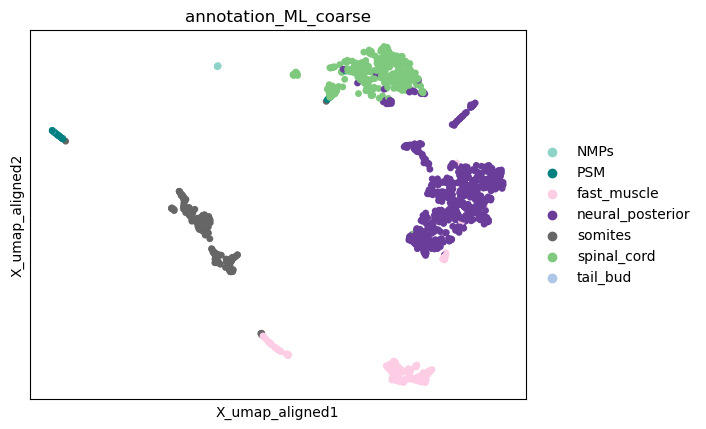

In [32]:
sc.pl.embedding(adata, basis="X_umap_aligned", color="annotation_ML_coarse")

In [5]:
# import the integrated object (with the latest annotation)
multiome = sc.read_h5ad("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/integrated_RNA_ATAC_counts_RNA_master_filtered.h5ad")
multiome

AnnData object with n_obs × n_vars = 94562 × 32057
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS_enrichment', 'TSS_percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'nCount_peaks_merged', 'nFeature_peaks_merged', 'SCT_weight', 'peaks_merged_weight', 'nCount_Gene_Activity', 'nFeature_Gene_Activity', 'nCount_peaks_integrated', 'nFeature_peaks_integrated', 'dataset', 'integrated_weight', 'peaks_integrated_weight', 'wsnn_res_0_8', 'seurat_clusters', 'data_source', 'annotation_ML', 'scANVI_zscape', 'annotation_ML_coarse', 'dev_stage'
    var: 'features'
    uns: 'annotation_ML_coarse_colors', 'annotation_ML_colors', 'dataset_colors', 'global_annotation_colors', 'log1p', 'scANVI_zscape_colors'
    obsm: 'X_umap.atac', 'X_umap.rna', 'X_wnn.umap'
    layers: 'counts'

In [4]:
umap_3d = pd.read_csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/integrated_umap_3d.csv", index_col=0)
umap_3d

wnnUMAP3D_1  wnnUMAP3D_2  wnnUMAP3D_3
AAACAGCCACCTAAGC-1_1    -0.137706     7.327008     1.705487
AAACAGCCAGGGAGGA-1_1    -6.518784    -3.304194     3.416562
AAACAGCCATAGACCC-1_1     4.225500    -4.013136    -1.511917
AAACATGCAAACTCAT-1_1     4.027218     1.829759     3.068354
AAACATGCAAGGACCA-1_1     0.829020     1.312716    -3.234008
...                           ...          ...          ...
TTTGTGTTCCCTCAGT-1_7    -1.693232    -0.845269     5.638190
TTTGTTGGTACCTTAC-1_7    -5.654027    -1.729249    -2.622199
TTTGTTGGTATTGAGT-1_7     5.477036    -2.216370     0.947655
TTTGTTGGTGCGCGTA-1_7    -6.895772     4.268608     1.806107
TTTGTTGGTTAAGGCC-1_7    -1.489841    -5.478075     3.328650

[95196 rows x 3 columns]

In [9]:
# filter out the "low_quality_cells"
umap_3d = umap_3d[umap_3d.index.isin(multiome.obs_names)]
umap_3d.head()

wnnUMAP3D_1  wnnUMAP3D_2  wnnUMAP3D_3
AAACAGCCACCTAAGC-1_1    -0.137706     7.327008     1.705487
AAACAGCCAGGGAGGA-1_1    -6.518784    -3.304194     3.416562
AAACAGCCATAGACCC-1_1     4.225500    -4.013136    -1.511917
AAACATGCAAACTCAT-1_1     4.027218     1.829759     3.068354
AAACATGCAAGGACCA-1_1     0.829020     1.312716    -3.234008

In [11]:
multiome.obsm["X_umap_joint_3d"] = np.array(umap_3d.values)
multiome

AnnData object with n_obs × n_vars = 94562 × 32057
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS_enrichment', 'TSS_percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'nCount_peaks_merged', 'nFeature_peaks_merged', 'SCT_weight', 'peaks_merged_weight', 'nCount_Gene_Activity', 'nFeature_Gene_Activity', 'nCount_peaks_integrated', 'nFeature_peaks_integrated', 'dataset', 'integrated_weight', 'peaks_integrated_weight', 'wsnn_res_0_8', 'seurat_clusters', 'data_source', 'annotation_ML', 'scANVI_zscape', 'annotation_ML_coarse', 'dev_stage'
    var: 'features'
    uns: 'annotation_ML_coarse_colors', 'annotation_ML_colors', 'dataset_colors', 'global_annotation_colors', 'log1p', 'scANVI_zscape_colors'
    obsm: 'X_umap.atac', 'X_umap.rna', 'X_wnn.umap', 'X_umap_joint_3d'
    layers: 'counts'

In [14]:
# import the latest annotation
annotation = pd.read_csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/annotations/annotation_ML_06052024.txt", index_col=0, sep="\t")
annotation

# create a dictionary for mapping the new annotation
dict_annotation = annotation["annotation_ML_v4"].to_dict()

In [18]:
# replace the annotation with the latest annotation (spinal cord and neural cells)
multiome.obs["annotation_ML"] = multiome.obs.index.map(dict_annotation)
multiome.obs["annotation_ML"]

AAACAGCCACCTAAGC-1_1                 epidermis
AAACAGCCAGGGAGGA-1_1                pronephros
AAACAGCCATAGACCC-1_1                 hindbrain
AAACATGCAAACTCAT-1_1               spinal_cord
AAACATGCAAGGACCA-1_1             neural_optic2
                                 ...          
TTTGTGTTCCCTCAGT-1_7                  tail_bud
TTTGTTGGTACCTTAC-1_7    lateral_plate_mesoderm
TTTGTTGGTATTGAGT-1_7          neural_posterior
TTTGTTGGTGCGCGTA-1_7        endocrine_pancreas
TTTGTTGGTTAAGGCC-1_7                   somites
Name: annotation_ML, Length: 94562, dtype: object

In [19]:
# create a list of celltypes from annotation_ML (fine annotation by Merlin Lange)
list_celltypes_ML = multiome.obs.annotation_ML.unique().tolist()
list_celltypes_ML

['epidermis',
 'pronephros',
 'hindbrain',
 'spinal_cord',
 'neural_optic2',
 'neural_floor_plate',
 'neural_crest2',
 'PSM',
 'optic_cup',
 'lateral_plate_mesoderm',
 'midbrain_hindbrain_boundary2',
 'neural_telencephalon',
 'differentiating_neurons',
 'muscle',
 'fast_muscle',
 'heart_myocardium',
 'somites',
 'NMPs',
 'epidermis2',
 'pharyngeal_arches',
 'floor_plate2',
 'hemangioblasts',
 'neural_posterior',
 'floor_plate',
 'tail_bud',
 'endoderm',
 'midbrain_hindbrain_boundary',
 'neural_crest',
 'neural_optic',
 'hematopoietic_vasculature',
 'endocrine_pancreas',
 'hatching_gland',
 'neurons',
 'notochord',
 'pronephros2',
 'enteric_neurons',
 'epidermis3',
 'epidermis4',
 'neural',
 'primordial_germ_cells']

In [22]:
# Remove NaNs from the list
elements = [el for el in list_celltypes_ML if isinstance(el, str)]

# Function to remove numbers
def remove_numbers(name):
    return re.sub(r'\d+', '', name)

# Create the dictionary
merged_dict = {}
for element in elements:
    merged_dict[element] = remove_numbers(element)

# Display the dictionary
merged_dict

{'epidermis': 'epidermis',
 'pronephros': 'pronephros',
 'hindbrain': 'hindbrain',
 'spinal_cord': 'spinal_cord',
 'neural_optic2': 'neural_optic',
 'neural_floor_plate': 'neural_floor_plate',
 'neural_crest2': 'neural_crest',
 'PSM': 'PSM',
 'optic_cup': 'optic_cup',
 'lateral_plate_mesoderm': 'lateral_plate_mesoderm',
 'midbrain_hindbrain_boundary2': 'midbrain_hindbrain_boundary',
 'neural_telencephalon': 'neural_telencephalon',
 'differentiating_neurons': 'differentiating_neurons',
 'muscle': 'muscle',
 'fast_muscle': 'fast_muscle',
 'heart_myocardium': 'heart_myocardium',
 'somites': 'somites',
 'NMPs': 'NMPs',
 'epidermis2': 'epidermis',
 'pharyngeal_arches': 'pharyngeal_arches',
 'floor_plate2': 'floor_plate',
 'hemangioblasts': 'hemangioblasts',
 'neural_posterior': 'neural_posterior',
 'floor_plate': 'floor_plate',
 'tail_bud': 'tail_bud',
 'endoderm': 'endoderm',
 'midbrain_hindbrain_boundary': 'midbrain_hindbrain_boundary',
 'neural_crest': 'neural_crest',
 'neural_optic': 'n

In [23]:
# generate a coarse-grained annotation - "annotation_ML_coarse"
multiome.obs["annotation_ML_coarse"] = multiome.obs["annotation_ML"].map(merged_dict)

multiome.obs["annotation_ML_coarse"]

AAACAGCCACCTAAGC-1_1                 epidermis
AAACAGCCAGGGAGGA-1_1                pronephros
AAACAGCCATAGACCC-1_1                 hindbrain
AAACATGCAAACTCAT-1_1               spinal_cord
AAACATGCAAGGACCA-1_1              neural_optic
                                 ...          
TTTGTGTTCCCTCAGT-1_7                  tail_bud
TTTGTTGGTACCTTAC-1_7    lateral_plate_mesoderm
TTTGTTGGTATTGAGT-1_7          neural_posterior
TTTGTTGGTGCGCGTA-1_7        endocrine_pancreas
TTTGTTGGTTAAGGCC-1_7                   somites
Name: annotation_ML_coarse, Length: 94562, dtype: object

In [24]:
# save the multiome object (filtered out the low_quality_cells, and updated the annotations)
multiome.write_h5ad("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/integrated_RNA_ATAC_counts_RNA_master_filtered.h5ad")

In [26]:
figpath = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/slingshot_individual_datasets"
filepath = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/annotations/"

In [28]:
list_datasets = ['TDR126',
                 'TDR127',
                 'TDR128',
                 'TDR118reseq',
                 'TDR119reseq',
                 'TDR125reseq',
                 'TDR124reseq']

/tmp/ipykernel_2131143/3432718935.py:31: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[annotation_class] = adata.obs_names.map(annotation_mapping)
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/util.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isint(cluster_labels[0]):


13568  cells exist
{'NMPs': 0, 'PSM': 1, 'differentiating_neurons': 2, 'endocrine_pancreas': 3, 'endoderm': 4, 'enteric_neurons': 5, 'epidermis': 6, 'fast_muscle': 7, 'floor_plate': 8, 'hatching_gland': 9, 'heart_myocardium': 10, 'hemangioblasts': 11, 'hematopoietic_vasculature': 12, 'hindbrain': 13, 'lateral_plate_mesoderm': 14, 'midbrain_hindbrain_boundary': 15, 'muscle': 16, 'neural': 17, 'neural_crest': 18, 'neural_floor_plate': 19, 'neural_optic': 20, 'neural_posterior': 21, 'neural_telencephalon': 22, 'neurons': 23, 'notochord': 24, 'optic_cup': 25, 'pharyngeal_arches': 26, 'primordial_germ_cells': 27, 'pronephros': 28, 'somites': 29, 'spinal_cord': 30, 'tail_bud': 31}
AAACAGCCACCTAAGC-1     6
AAACAGCCAGGGAGGA-1    28
AAACAGCCATAGACCC-1    13
AAACATGCAAACTCAT-1    30
AAACATGCAAGGACCA-1    20
Name: annotation_ML_coarse_integer, dtype: int8
int8
Lineages: [Lineage[0, 31, 1, 16], Lineage[0, 31, 1, 29, 7], Lineage[0, 31, 1, 29, 13, 2, 17, 19, 8, 27, 12], Lineage[0, 31, 1, 29, 13, 2, 

  0%|          | 0/1 [00:00<?, ?it/s]

Reversing from leaf to root
Averaging branch @28 with lineages: [7, 8] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14f982405810>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f9824056f0>]
Averaging branch @20 with lineages: [4, 5] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14f9824055a0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f982405570>]
Averaging branch @27 with lineages: [2, 3, 4, 5, 6, 7, 8] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14f981d98040>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f982405450>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f9824056c0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f9824051b0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f981d9bbb0>]
Averaging branch @2 with lineages: [2, 3, 4, 5, 6, 7, 8, 9, 10] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14f981d6d120>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f982405930>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f982405a50>]
Averaging branch @29 with lineages: [1, 

/tmp/ipykernel_2131143/3432718935.py:31: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[annotation_class] = adata.obs_names.map(annotation_mapping)
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/util.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isint(cluster_labels[0]):


12413  cells exist
{'NMPs': 0, 'PSM': 1, 'differentiating_neurons': 2, 'endocrine_pancreas': 3, 'endoderm': 4, 'enteric_neurons': 5, 'epidermis': 6, 'fast_muscle': 7, 'floor_plate': 8, 'hatching_gland': 9, 'heart_myocardium': 10, 'hemangioblasts': 11, 'hematopoietic_vasculature': 12, 'hindbrain': 13, 'lateral_plate_mesoderm': 14, 'midbrain_hindbrain_boundary': 15, 'muscle': 16, 'neural': 17, 'neural_crest': 18, 'neural_floor_plate': 19, 'neural_optic': 20, 'neural_posterior': 21, 'neural_telencephalon': 22, 'neurons': 23, 'notochord': 24, 'optic_cup': 25, 'pharyngeal_arches': 26, 'primordial_germ_cells': 27, 'pronephros': 28, 'somites': 29, 'spinal_cord': 30, 'tail_bud': 31}
AAACAGCCACTCGCTC-1    10
AAACAGCCAGTTATGT-1     3
AAACAGCCATCTAGCA-1    29
AAACAGCCATTCCTCG-1     9
AAACATGCAAGGTCCT-1    16
Name: annotation_ML_coarse_integer, dtype: int8
int8
Lineages: [Lineage[0, 30, 23, 2, 8, 17], Lineage[0, 30, 23, 2, 8, 19, 13, 9], Lineage[0, 30, 23, 2, 8, 27, 15, 28, 11], Lineage[0, 30, 23,

  0%|          | 0/1 [00:00<?, ?it/s]

Reversing from leaf to root
Averaging branch @20 with lineages: [5, 6] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14f981290e50>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f981290f70>]
Averaging branch @12 with lineages: [3, 4] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14f981290c10>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f981290d30>]
Averaging branch @28 with lineages: [2, 3, 4] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14f981291630>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f981290970>]
Averaging branch @8 with lineages: [0, 1, 2, 3, 4] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14f9812908b0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f981290940>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f9817fc160>]
Averaging branch @2 with lineages: [0, 1, 2, 3, 4, 5, 6] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14f9817fc5b0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f9b22cd6c0>]
Averaging branch @23 with lineages: [0, 1, 2, 3, 4, 5, 6, 7] [<pcur

/tmp/ipykernel_2131143/3432718935.py:31: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[annotation_class] = adata.obs_names.map(annotation_mapping)
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/util.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isint(cluster_labels[0]):


17130  cells exist
{'NMPs': 0, 'PSM': 1, 'differentiating_neurons': 2, 'endocrine_pancreas': 3, 'endoderm': 4, 'enteric_neurons': 5, 'epidermis': 6, 'fast_muscle': 7, 'floor_plate': 8, 'hatching_gland': 9, 'heart_myocardium': 10, 'hemangioblasts': 11, 'hematopoietic_vasculature': 12, 'hindbrain': 13, 'lateral_plate_mesoderm': 14, 'midbrain_hindbrain_boundary': 15, 'muscle': 16, 'neural': 17, 'neural_crest': 18, 'neural_floor_plate': 19, 'neural_optic': 20, 'neural_posterior': 21, 'neural_telencephalon': 22, 'neurons': 23, 'notochord': 24, 'optic_cup': 25, 'pharyngeal_arches': 26, 'primordial_germ_cells': 27, 'pronephros': 28, 'somites': 29, 'spinal_cord': 30, 'tail_bud': 31}
AAACAGCCAATAGTCT-1    15
AAACAGCCAATTGAAG-1    19
AAACAGCCACAACAAA-1    24
AAACAGCCACCTACTT-1    12
AAACAGCCACTGACTA-1    15
Name: annotation_ML_coarse_integer, dtype: int8
int8
Lineages: [Lineage[0, 24, 1, 16, 7], Lineage[0, 24, 29, 28, 4, 18, 3, 9, 8, 15], Lineage[0, 24, 29, 28, 4, 18, 3, 9, 11], Lineage[0, 24, 2

  0%|          | 0/1 [00:00<?, ?it/s]

Reversing from leaf to root
Averaging branch @13 with lineages: [5, 6] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14f95e663610>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f95e661090>]
Averaging branch @2 with lineages: [5, 6, 7] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14f95cb9af20>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f95e6638b0>]
Averaging branch @20 with lineages: [3, 4, 5, 6, 7] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14f95e663910>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f95e6626b0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f95e660550>]
Averaging branch @9 with lineages: [1, 2, 3, 4, 5, 6, 7, 8] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14f95e663b80>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f95e663c40>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f95cb9af50>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f95e661450>]
Averaging branch @28 with lineages: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] [<pcurvepy2.pcurve.Principal

/tmp/ipykernel_2131143/3432718935.py:31: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[annotation_class] = adata.obs_names.map(annotation_mapping)
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/util.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isint(cluster_labels[0]):


6528  cells exist
{'NMPs': 0, 'PSM': 1, 'differentiating_neurons': 2, 'endocrine_pancreas': 3, 'endoderm': 4, 'enteric_neurons': 5, 'epidermis': 6, 'fast_muscle': 7, 'floor_plate': 8, 'hatching_gland': 9, 'heart_myocardium': 10, 'hemangioblasts': 11, 'hematopoietic_vasculature': 12, 'hindbrain': 13, 'lateral_plate_mesoderm': 14, 'midbrain_hindbrain_boundary': 15, 'muscle': 16, 'neural': 17, 'neural_crest': 18, 'neural_floor_plate': 19, 'neural_optic': 20, 'neural_posterior': 21, 'neural_telencephalon': 22, 'neurons': 23, 'optic_cup': 24, 'pharyngeal_arches': 25, 'primordial_germ_cells': 26, 'pronephros': 27, 'somites': 28, 'spinal_cord': 29, 'tail_bud': 30}
AAACAGCCAAGGCCAA-1    15
AAACAGCCAATATAGG-1    28
AAACAGCCACCTAATG-1    20
AAACAGCCAGCATGAG-1    19
AAACAGCCATTGACAT-1    21
Name: annotation_ML_coarse_integer, dtype: int8
int8
Lineages: [Lineage[0, 28, 16, 5, 2, 9, 8], Lineage[0, 28, 16, 5, 2, 9, 17], Lineage[0, 28, 16, 5, 2, 9, 20, 30, 1], Lineage[0, 28, 16, 5, 2, 9, 21, 23, 13],

  0%|          | 0/1 [00:00<?, ?it/s]

Reversing from leaf to root
Averaging branch @25 with lineages: [10, 11, 12] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14f980dabca0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f980dabb50>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f980dabc70>]
Averaging branch @26 with lineages: [9, 10, 11, 12] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14f980684d00>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f980daba30>]
Averaging branch @23 with lineages: [3, 4] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14f980dab550>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f980dab670>]
Averaging branch @9 with lineages: [0, 1, 2, 3, 4, 5, 6, 7] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14f980dab280>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f980dab8b0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f980dab310>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f980684d60>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14f980dab790>, <pcurvepy2.pcurve.PrincipalCurve object at 0

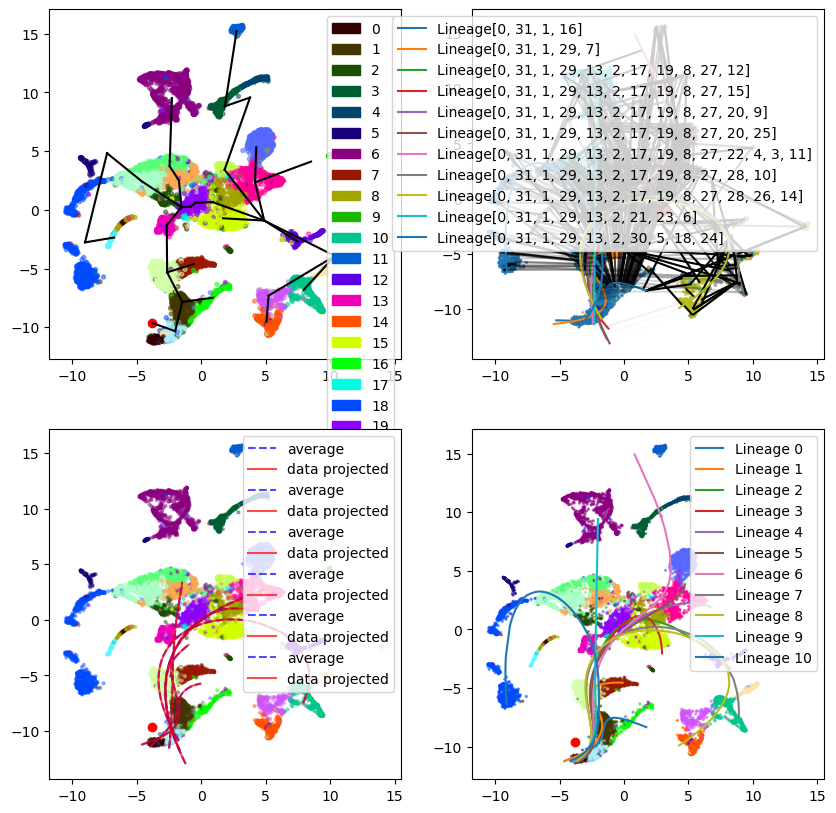

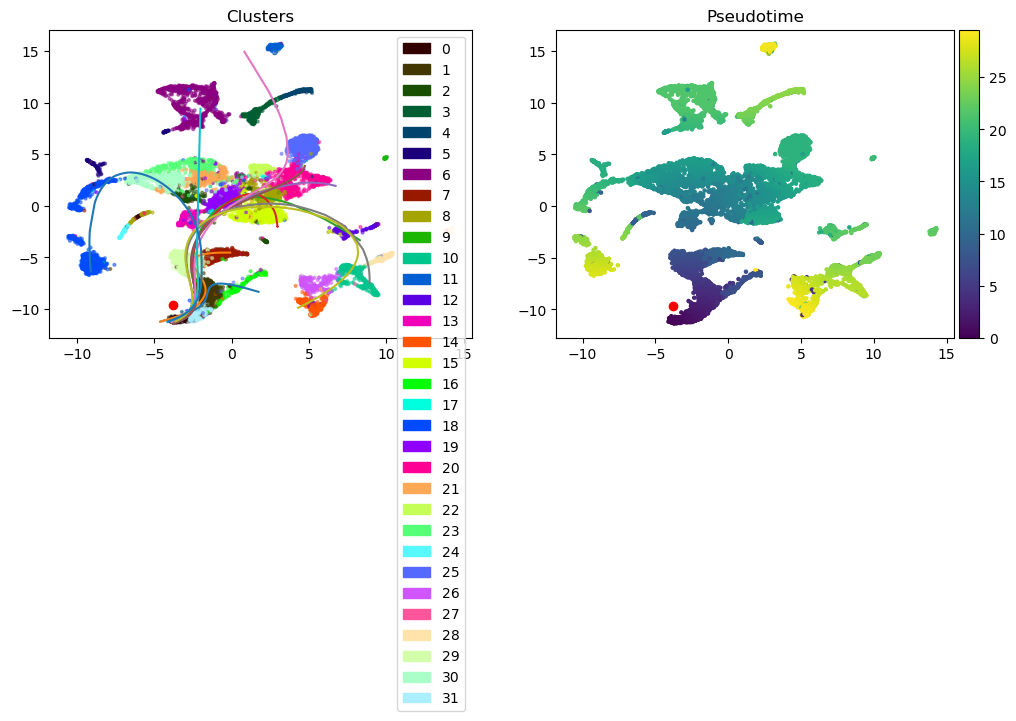

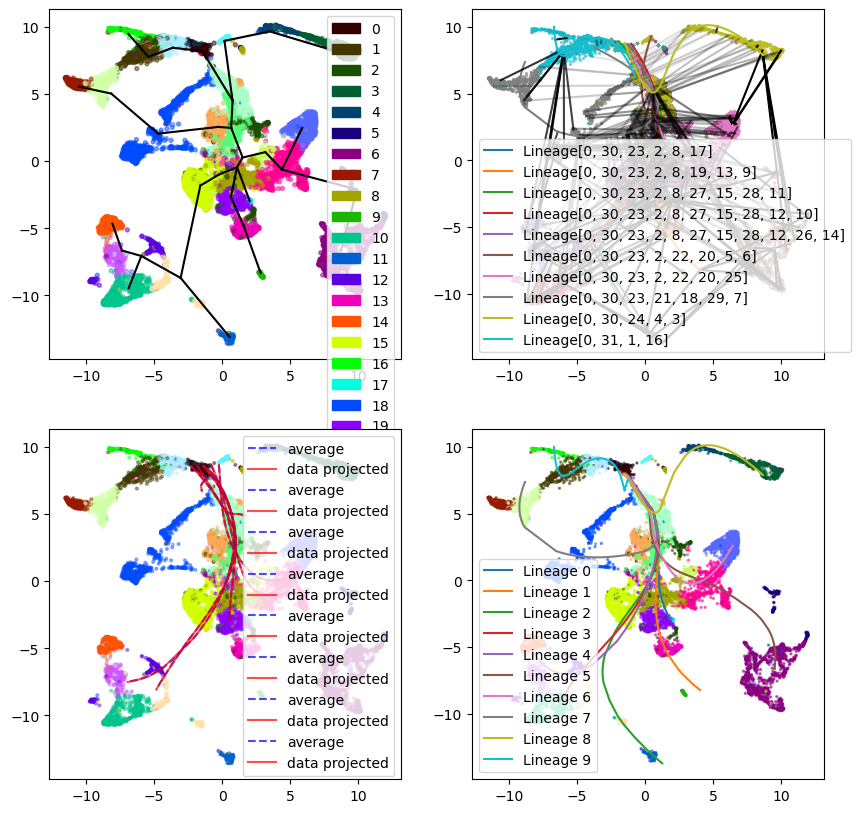

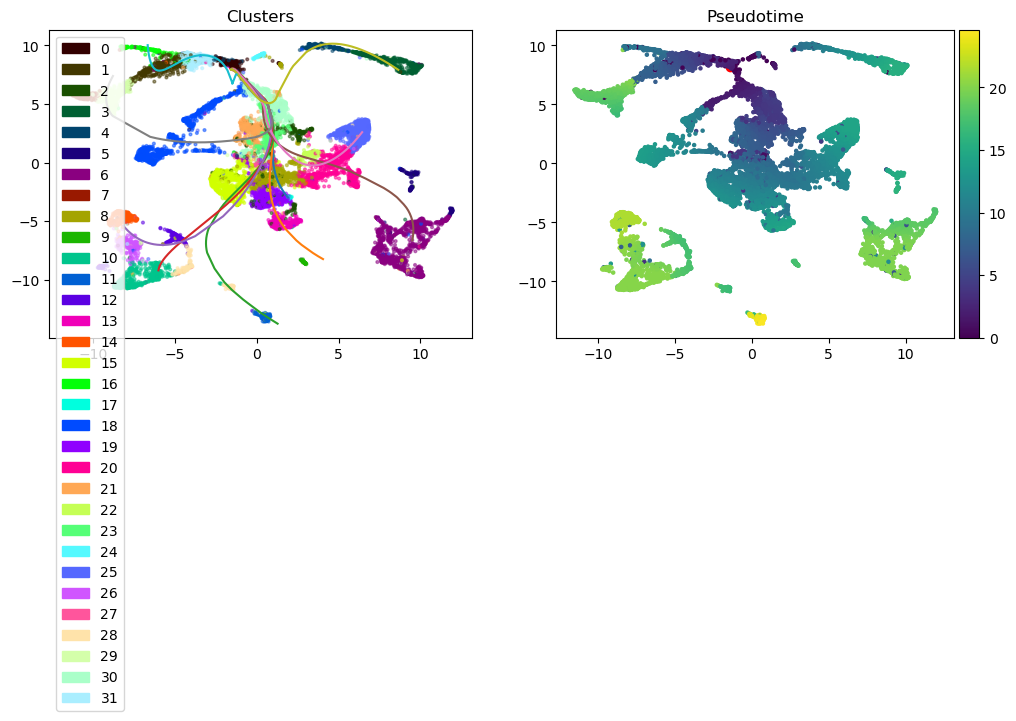

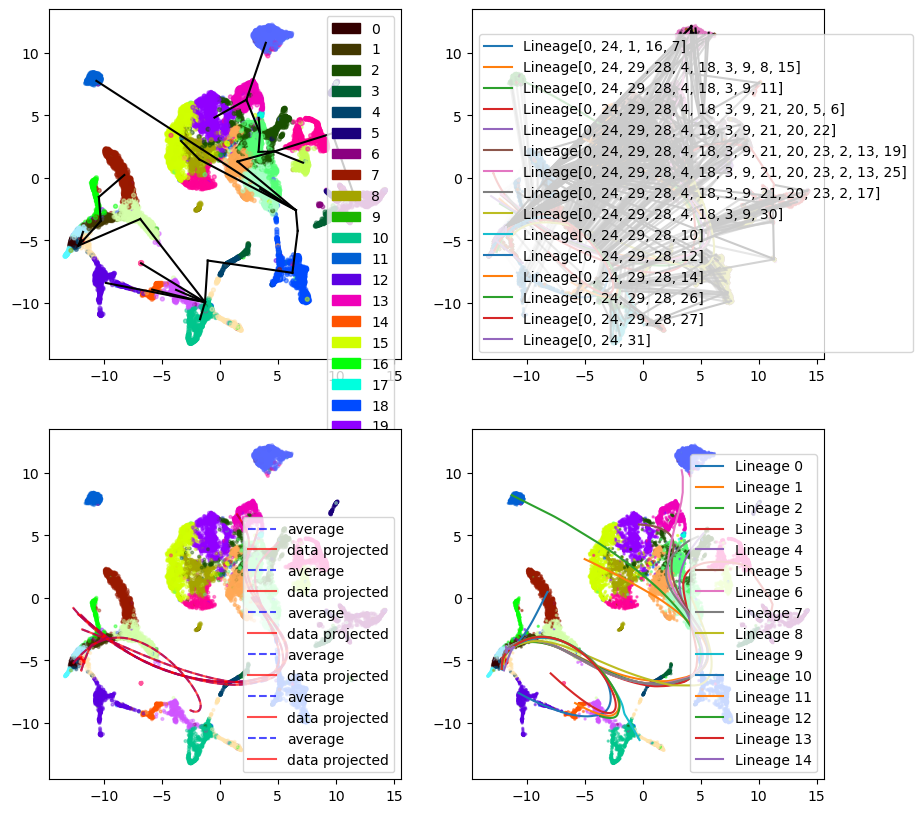

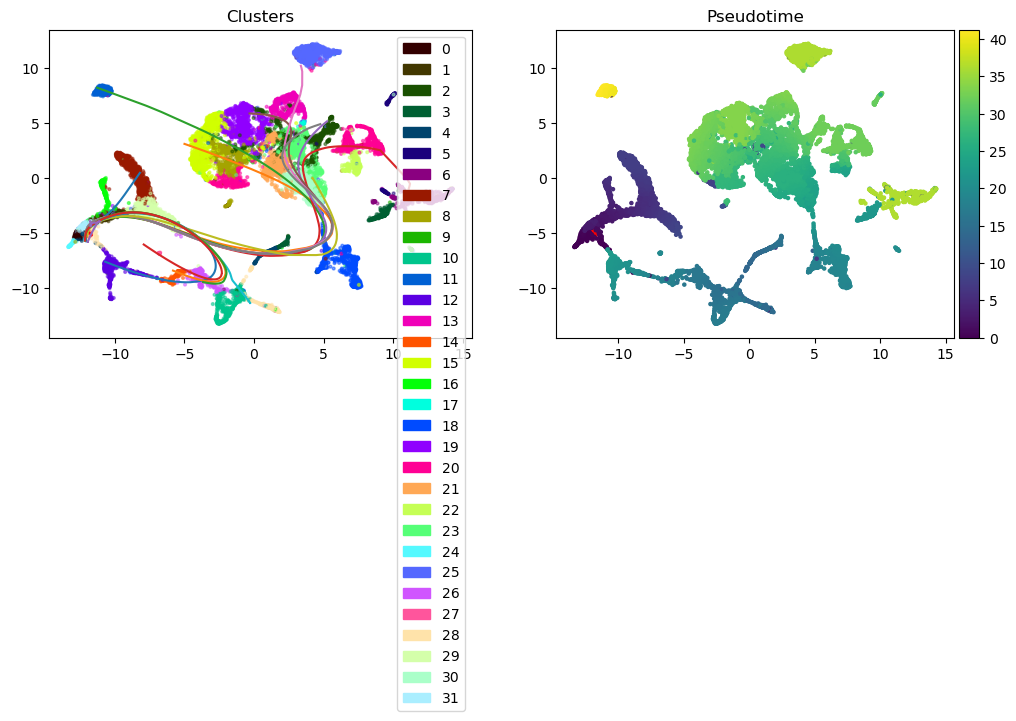

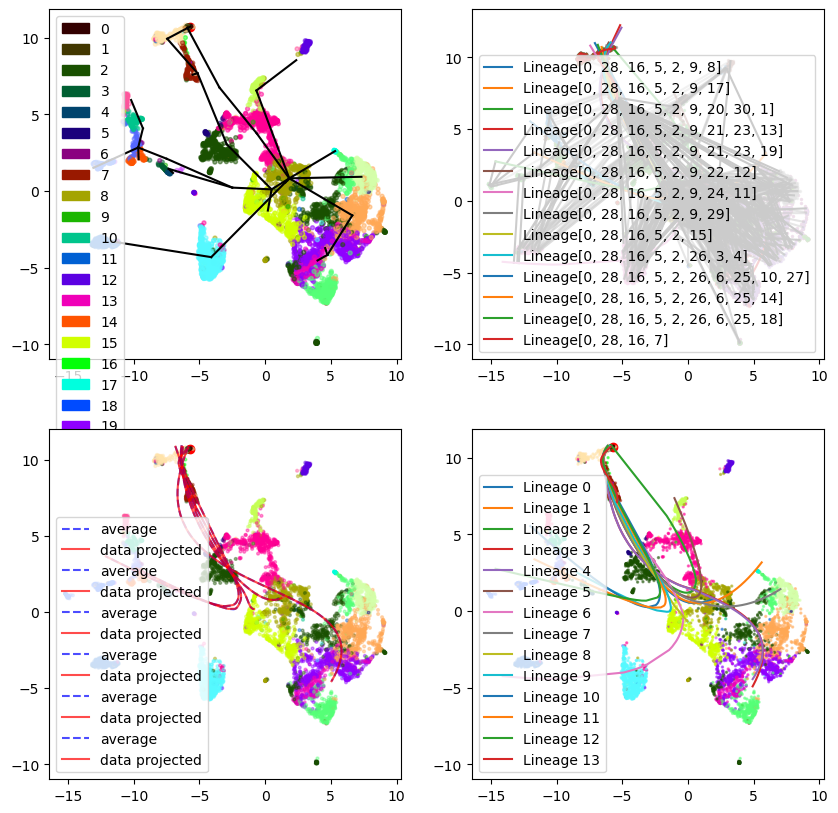

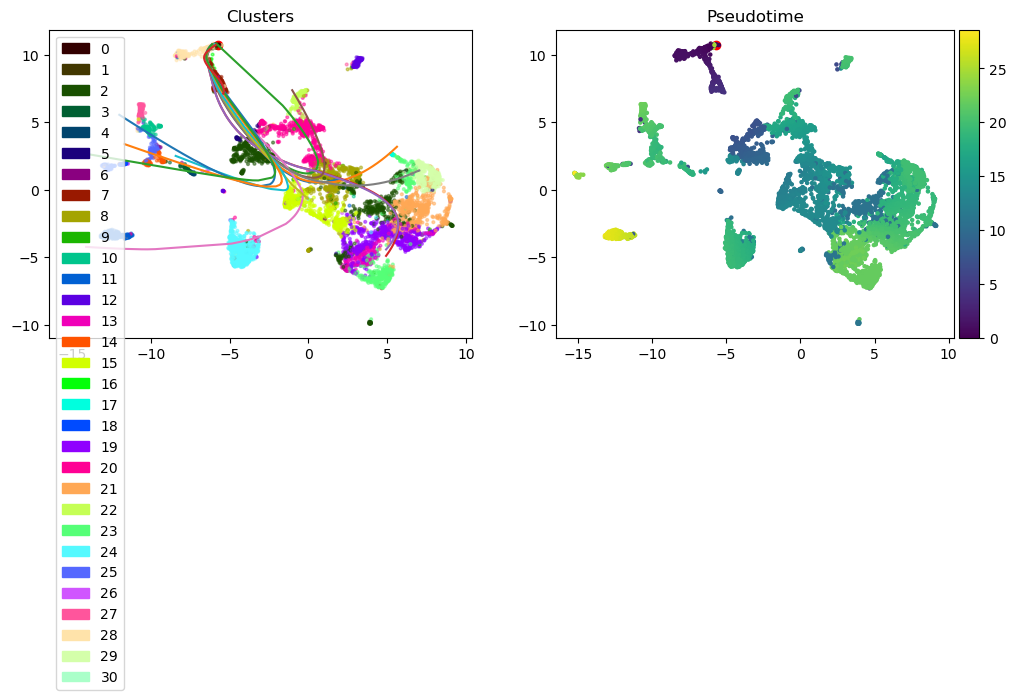

In [51]:
# Assign arguments to variables
# filepath = ""
# data_id = args.data_id
annotation_class = "annotation_ML_coarse"
progenitor_cluster_name = "NMPs" #args.progenitor_cluster
embedding_key = "X_umap.joint" #args.embedding_key

# define the master data filepath
data_path = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/"

for dataset in list_datasets:
    
    # strip off "reseq" for the data_id
    data_id = dataset.replace("reseq","")
    # import the dataset
    adata = sc.read_h5ad(data_path + f"{dataset}/{data_id}_processed_RNA.h5ad")
    
    # transfer the annotations
    # subset the adata
    subset = multiome[multiome.obs["dataset"]==data_id]
    # correct indices by removing the appended '_X' or any such pattern
    subset.obs_names = subset.obs_names.str.replace(r'_[^_]*$', '', regex=True)
    
    # create a mapping from the subset to the original data based on index
    annotation_mapping = subset.obs[annotation_class]
    
    # map the annotations to the 'data' object using the corrected indices
    # first, subset for the shared cell_ids
    adata =adata[adata.obs_names.isin(subset.obs_names)]
    # this step assumes that indices in 'data' after modification are a subset of those in 'subset'
    adata.obs[annotation_class] = adata.obs_names.map(annotation_mapping)
    
    print(str(len(adata)), " cells exist")
    

    # Assuming 'manual_annotation' contains the categories as shown
    try:
        categories = adata.obs[annotation_class].cat.categories
    except:
        categories = adata.obs[annotation_class].unique()

    # Create a dictionary mapping each category to an integer
    category_to_integer = {category: i for i, category in enumerate(categories)}
    # Print the mapping to verify
    print(category_to_integer)

    # Replace the categorical labels in the DataFrame with the mapped integers
    new_annotation = annotation_class + "_integer"
    adata.obs[new_annotation] = adata.obs[annotation_class].map(category_to_integer)

    # Convert categorical labels to integer codes
    try:
        adata.obs[new_annotation] = adata.obs[annotation_class].cat.codes
    except:
        adata.obs[new_annotation] = adata.obs[annotation_class].astype('category').cat.codes

    # Check the new column to ensure the mapping is correct and the datatype
    print(adata.obs[new_annotation].head())
    print(adata.obs[new_annotation].dtype)

    # Run pySlingshot
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    custom_xlim = (-12, 12)
    custom_ylim = (-12, 12)
    # plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)
    # define the progenitor_cluster
    progenitor_cluster = category_to_integer[progenitor_cluster_name]

    slingshot = Slingshot(adata, celltype_key=new_annotation, 
                          obsm_key=embedding_key, start_node=progenitor_cluster, 
                          debug_level='verbose')

    slingshot.fit(num_epochs=1, debug_axes=axes)

    fig.savefig(figpath + f"{data_id}_pyslingshot_pseudotime_run.png")

    # Additional pseudotime plots
    fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
    axes[0].set_title('Clusters')
    axes[1].set_title('Pseudotime')
    slingshot.plotter.curves(axes[0], slingshot.curves)
    slingshot.plotter.clusters(axes[0], labels=np.arange(slingshot.num_clusters), s=4, alpha=0.5)
    slingshot.plotter.clusters(axes[1], color_mode='pseudotime', s=5)
    fig.savefig(filepath + f"{data_id}_pyslingshot_pseudotime.png")

    # Save the pseudotime values to the dataframe
    # NOTE: the Slingshot class has a property which has the pseudotime that is used to 
    # color the plot above
    pseudotime = slingshot.unified_pseudotime
    pseudotime

    # if there's already "Pseudotime" column, then replace it with the new one.
    if "Pseudotime" in adata.obs.columns:
        # move the "Pseudotime" to "Pseudotime_DPT
        adata.obs["Pseudotime_DPT"] = adata.obs["Pseudotime"]
        adata.obs["Pseudotime"] = pseudotime
    else:
        adata.obs["Pseudotime"] = pseudotime


    # add the columns for lineages (mesoderm/neuroectoderm) - used later in CellOracle
    Lineage_Meso = ["NMPs","tail_bud","PSM","somites","fast_muscle"]
    Lineage_NeuroEcto = ["NMPs", "spinal_cord", "neural_posterior"]

    adata.obs["Lineage_Meso"] = adata.obs[annotation_class].isin(Lineage_Meso)
    adata.obs["Lineage_NeuroEcto"] = adata.obs[annotation_class].isin(Lineage_NeuroEcto)

    # Fill in Pseudotime for Lineage_Meso where Lineage_Meso is True
    adata.obs['Pseudotime_Lineage_Meso'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_Meso'], np.nan)

    # Fill in Pseudotime for Lineage_NeuroEcto where Lineage_NeuroEcto is True
    adata.obs['Pseudotime_Lineage_NeuroEcto'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_NeuroEcto'], np.nan)

    # save the adata.obs as a dataframe (csv file) for further analysis
    adata.obs.to_csv(filepath + f"{data_id}_slingshot.csv")

In [47]:
category_to_integer

{'NMPs': 0,
 'PSM': 1,
 'differentiating_neurons': 2,
 'endocrine_pancreas': 3,
 'endoderm': 4,
 'enteric_neurons': 5,
 'epidermis': 6,
 'fast_muscle': 7,
 'floor_plate': 8,
 'hatching_gland': 9,
 'heart_myocardium': 10,
 'hemangioblasts': 11,
 'hematopoietic_vasculature': 12,
 'hindbrain': 13,
 'lateral_plate_mesoderm': 14,
 'midbrain_hindbrain_boundary': 15,
 'muscle': 16,
 'neural': 17,
 'neural_crest': 18,
 'neural_floor_plate': 19,
 'neural_optic': 20,
 'neural_posterior': 21,
 'neural_telencephalon': 22,
 'neurons': 23,
 'notochord': 24,
 'optic_cup': 25,
 'pharyngeal_arches': 26,
 'primordial_germ_cells': 27,
 'pronephros': 28,
 'somites': 29,
 'spinal_cord': 30,
 'tail_bud': 31}

In [41]:
# # add the columns for lineages (mesoderm/neuroectoderm) - used later in CellOracle
# Lineage_Meso = ["NMPs","tail_bud","PSM","somites","fast_muscle"]
# Lineage_NeuroEcto = ["NMPs", "spinal_cord", "neural_posterior"]

# adata.obs["Lineage_Meso"] = adata.obs[annotation_class].isin(Lineage_Meso)
# adata.obs["Lineage_NeuroEcto"] = adata.obs[annotation_class].isin(Lineage_NeuroEcto)

# # Fill in Pseudotime for Lineage_Meso where Lineage_Meso is True
# adata.obs['Pseudotime_Lineage_Meso'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_Meso'], np.nan)

# # Fill in Pseudotime for Lineage_NeuroEcto where Lineage_NeuroEcto is True
# adata.obs['Pseudotime_Lineage_NeuroEcto'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_NeuroEcto'], np.nan)

# # save the adata.obs as a dataframe (csv file) for further analysis
# adata.obs.to_csv(filepath + f"{data_id}_slingshot.csv")

## test with a sample dataset

In [5]:
adata = sc.read_h5ad("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/08_NMPs_subsetted/TDR118reseq_NMPs.h5ad")
adata

AnnData object with n_obs × n_vars = 8237 × 32057
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS_enrichment', 'TSS_percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'nCount_peaks_merged', 'nFeature_peaks_merged', 'SCT_weight', 'peaks_merged_weight', 'nCount_Gene_Activity', 'nFeature_Gene_Activity', 'manual_annotation'
    var: 'features'
    uns: 'global_annotation_colors', 'manual_annotation_colors'
    obsm: 'X_umap.atac', 'X_umap.joint', 'X_umap.rna', 'X_umap_aligned'

In [8]:
# Assuming 'manual_annotation' contains the categories as shown
categories = adata.obs['manual_annotation'].cat.categories

# Create a dictionary mapping each category to an integer
category_to_integer = {category: i for i, category in enumerate(categories)}

# Print the mapping to verify
print(category_to_integer)

{'Muscle': 0, 'NMPs': 1, 'Neural_Anterior': 2, 'Neural_Posterior': 3, 'PSM': 4, 'Somites': 5}


In [10]:
# Replace the categorical labels in the DataFrame with the mapped integers
adata.obs['manual_annotation_integer'] = adata.obs['manual_annotation'].map(category_to_integer)

# # Check the new column to ensure the mapping is correct
# print(adata.obs.head())

In [19]:
# Convert categorical labels to integer codes
adata.obs['manual_annotation_integer'] = adata.obs['manual_annotation'].cat.codes

# Check the new column to ensure the mapping is correct and the datatype
print(adata.obs['manual_annotation_integer'].head())
print(adata.obs['manual_annotation_integer'].dtype)

AAACAGCCATAGACCC-1    3
AAACATGCAAACTCAT-1    3
AAACATGCAAGGACCA-1    2
AAACATGCAAGGATTA-1    2
AAACATGCAGGACCTT-1    4
Name: manual_annotation_integer, dtype: int8
int8


In [20]:
# # Get the category labels
# categories = adata.obs['manual_annotation'].cat.categories

# # Get the integer codes
# codes = adata.obs['manual_annotation'].cat.codes.unique()

# # Create a dictionary from categories to codes
# category_to_code_map = dict(zip(categories, codes))

# # Print the mapping to verify
# print(category_to_code_map)

{'Muscle': 3, 'NMPs': 2, 'Neural_Anterior': 4, 'Neural_Posterior': 0, 'PSM': 5, 'Somites': 1}


/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/util.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isint(cluster_labels[0]):


Lineages: [Lineage[1, 3, 2], Lineage[1, 4, 5, 0]]


  0%|          | 0/1 [00:00<?, ?it/s]/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/slingshot.py:333: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D


Reversing from leaf to root
Averaging branch @1 with lineages: [0, 1] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14bdd23b60b0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14bdd227b460>]
Shrinking branch @1 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x14bdd23b60b0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14bdd227b460>]


100%|██████████| 1/1 [00:46<00:00, 46.50s/it]


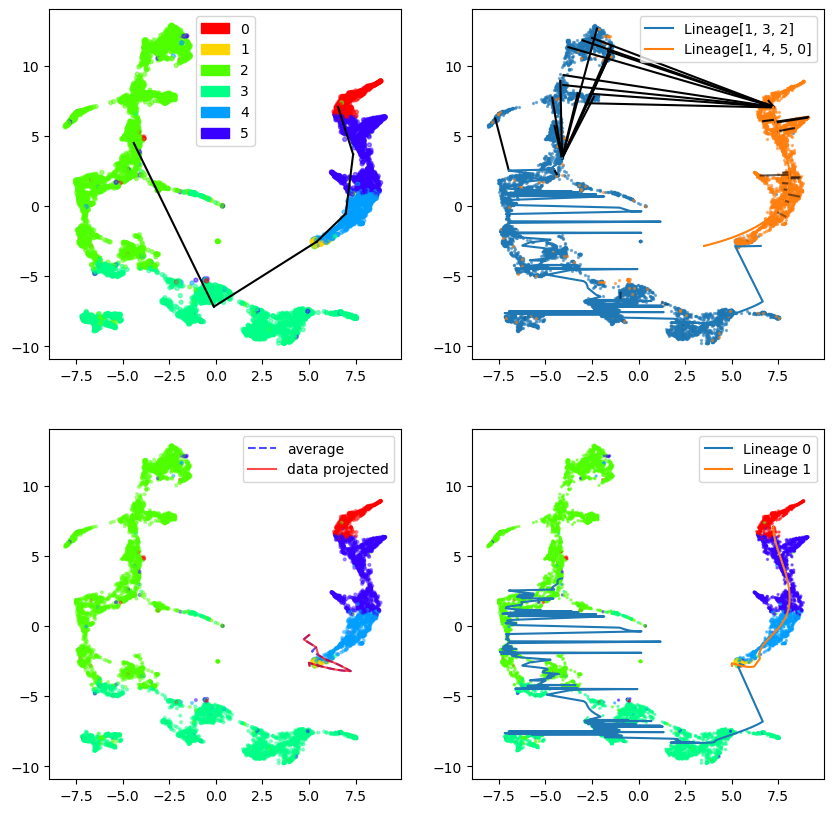

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
custom_xlim = (-12, 12)
custom_ylim = (-12, 12)
# plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)

slingshot = Slingshot(adata, celltype_key="manual_annotation_integer", 
                      obsm_key="X_umap_aligned", start_node=1, 
                      debug_level='verbose')

slingshot.fit(num_epochs=1, debug_axes=axes)

In [ ]:
fig.savefig

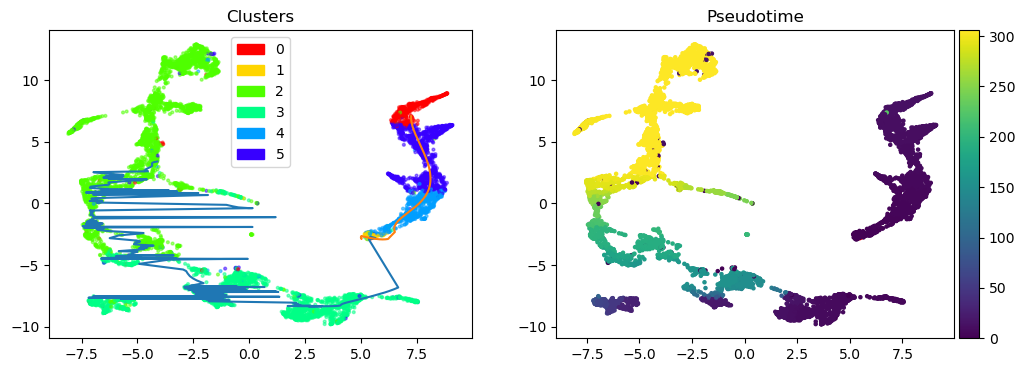

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].set_title('Clusters')
axes[1].set_title('Pseudotime')
slingshot.plotter.curves(axes[0], slingshot.curves)
slingshot.plotter.clusters(axes[0], labels=np.arange(slingshot.num_clusters), s=4, alpha=0.5)
slingshot.plotter.clusters(axes[1], color_mode='pseudotime', s=5)

### get Pseudotime

In [26]:
# NOTE: the Slingshot class has a property which has the pseudotime that is used to 
# color the plot above
pseudotime = slingshot.unified_pseudotime
pseudotime

array([ 28.66250219,   6.99793257, 305.62432148, ..., 305.62432148,
       161.04768423, 305.62432148])

In [27]:
len(pseudotime)

8237

### map the pseudotime into adata object

In [36]:
adata

AnnData object with n_obs × n_vars = 8237 × 32057
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS_enrichment', 'TSS_percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'nCount_peaks_merged', 'nFeature_peaks_merged', 'SCT_weight', 'peaks_merged_weight', 'nCount_Gene_Activity', 'nFeature_Gene_Activity', 'manual_annotation', 'manual_annotation_integer'
    var: 'features'
    uns: 'global_annotation_colors', 'manual_annotation_colors'
    obsm: 'X_umap.atac', 'X_umap.joint', 'X_umap.rna', 'X_umap_aligned'

In [37]:
adata.obs["Pseudotime"] = pseudotime

In [38]:
adata.obs.head()

orig_ident  nCount_RNA  nFeature_RNA  nCount_ATAC  \
AAACAGCCATAGACCC-1           0     12581.0          3467      51485.0   
AAACATGCAAACTCAT-1           0      5642.0          2145      19812.0   
AAACATGCAAGGACCA-1           0      2691.0           838       5182.0   
AAACATGCAAGGATTA-1           0      4233.0          1703      24072.0   
AAACATGCAGGACCTT-1           0     14247.0          3236       8685.0   

                    nFeature_ATAC  nucleosome_signal  nucleosome_percentile  \
AAACAGCCATAGACCC-1          19874           0.514213                   0.24   
AAACATGCAAACTCAT-1           9183           0.673319                   0.85   
AAACATGCAAGGACCA-1           2565           0.394904                   0.06   
AAACATGCAAGGATTA-1          10949           0.642451                   0.72   
AAACATGCAGGACCTT-1           4214           0.477004                   0.18   

                    TSS_enrichment  TSS_percentile  nCount_SCT  ...  \
AAACAGCCATAGACCC-1        5.238692            0.92      5781.0  ...   
AAACATGCAAACTCAT-1        4.409525            0.41      5363.0  ...   
AAACATGCAAGGACCA-1        4.939061            0.83      4727.0  ...   
AAACATGCAAGGATTA-1        4.636479            0.62      4729.0  ...   
AAACATGCAGGACCTT-1        4.089459            0.17      5540.0  ...   

                    nFeature_peaks_celltype nCount_peaks_merged  \
AAACAGCCATAGACCC-1                    19930             29548.0   
AAACATGCAAACTCAT-1                     9116             11621.0   
AAACATGCAAGGACCA-1                     2559              2983.0   
AAACATGCAAGGATTA-1                    10983             13992.0   
AAACATGCAGGACCTT-1                     4319              5313.0   

                    nFeature_peaks_merged  SCT_weight  peaks_merged_weight  \
AAACAGCCATAGACCC-1                  21333    0.572315             0.427685   
AAACATGCAAACTCAT-1                   9939    0.481765             0.518235   
AAACATGCAAGGACCA-1                   2761    0.408465             0.591535   
AAACATGCAAGGATTA-1                  11828    0.607841             0.392159   
AAACATGCAGGACCTT-1                   4784    0.479407             0.520593   

                    nCount_Gene_Activity  nFeature_Gene_Activity  \
AAACAGCCATAGACCC-1               26083.0                   10345   
AAACATGCAAACTCAT-1               11748.0                    6534   
AAACATGCAAGGACCA-1                3061.0                    2376   
AAACATGCAAGGATTA-1               13152.0                    7376   
AAACATGCAGGACCTT-1                5882.0                    3931   

                    manual_annotation  manual_annotation_integer  Pseudotime  
AAACAGCCATAGACCC-1   Neural_Posterior                          3   28.662502  
AAACATGCAAACTCAT-1   Neural_Posterior                          3    6.997933  
AAACATGCAAGGACCA-1    Neural_Anterior                          2  305.624321  
AAACATGCAAGGATTA-1    Neural_Anterior                          2  183.908195  
AAACATGCAGGACCTT-1                PSM                          4    5.059997  

[5 rows x 25 columns]

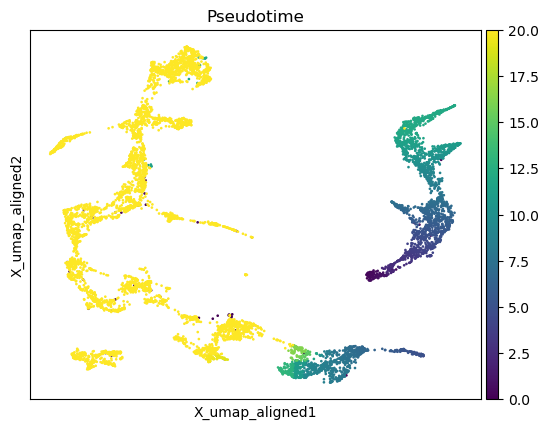

In [43]:
sc.pl.embedding(adata, basis="X_umap_aligned",
                color="Pseudotime", vmax=20)

In [49]:
# add the columns for lineages (mesoderm/neuroectoderm) - used later in CellOracle
Lineage_Meso = ["NMPs","PSM","Somites","Muscle"]
Lineage_NeuroEcto = ["NMPs", "Neural_Posterior", "Neural_Anterior"]

adata.obs["Lineage_Meso"] = adata.obs.manual_annotation.isin(Lineage_Meso)
adata.obs["Lineage_NeuroEcto"] = adata.obs.manual_annotation.isin(Lineage_NeuroEcto)

In [50]:
adata.obs["Lineage_Meso"] = adata.obs.manual_annotation.isin(Lineage_Meso)
adata.obs["Lineage_NeuroEcto"] = adata.obs.manual_annotation.isin(Lineage_NeuroEcto)

orig_ident  nCount_RNA  nFeature_RNA  nCount_ATAC  \
AAACAGCCATAGACCC-1           0     12581.0          3467      51485.0   
AAACATGCAAACTCAT-1           0      5642.0          2145      19812.0   
AAACATGCAAGGACCA-1           0      2691.0           838       5182.0   
AAACATGCAAGGATTA-1           0      4233.0          1703      24072.0   
AAACATGCAGGACCTT-1           0     14247.0          3236       8685.0   

                    nFeature_ATAC  nucleosome_signal  nucleosome_percentile  \
AAACAGCCATAGACCC-1          19874           0.514213                   0.24   
AAACATGCAAACTCAT-1           9183           0.673319                   0.85   
AAACATGCAAGGACCA-1           2565           0.394904                   0.06   
AAACATGCAAGGATTA-1          10949           0.642451                   0.72   
AAACATGCAGGACCTT-1           4214           0.477004                   0.18   

                    TSS_enrichment  TSS_percentile  nCount_SCT  ...  \
AAACAGCCATAGACCC-1        5.238692            0.92      5781.0  ...   
AAACATGCAAACTCAT-1        4.409525            0.41      5363.0  ...   
AAACATGCAAGGACCA-1        4.939061            0.83      4727.0  ...   
AAACATGCAAGGATTA-1        4.636479            0.62      4729.0  ...   
AAACATGCAGGACCTT-1        4.089459            0.17      5540.0  ...   

                    nFeature_peaks_merged SCT_weight  peaks_merged_weight  \
AAACAGCCATAGACCC-1                  21333   0.572315             0.427685   
AAACATGCAAACTCAT-1                   9939   0.481765             0.518235   
AAACATGCAAGGACCA-1                   2761   0.408465             0.591535   
AAACATGCAAGGATTA-1                  11828   0.607841             0.392159   
AAACATGCAGGACCTT-1                   4784   0.479407             0.520593   

                    nCount_Gene_Activity  nFeature_Gene_Activity  \
AAACAGCCATAGACCC-1               26083.0                   10345   
AAACATGCAAACTCAT-1               11748.0                    6534   
AAACATGCAAGGACCA-1                3061.0                    2376   
AAACATGCAAGGATTA-1               13152.0                    7376   
AAACATGCAGGACCTT-1                5882.0                    3931   

                    manual_annotation  manual_annotation_integer  Pseudotime  \
AAACAGCCATAGACCC-1   Neural_Posterior                          3   28.662502   
AAACATGCAAACTCAT-1   Neural_Posterior                          3    6.997933   
AAACATGCAAGGACCA-1    Neural_Anterior                          2  305.624321   
AAACATGCAAGGATTA-1    Neural_Anterior                          2  183.908195   
AAACATGCAGGACCTT-1                PSM                          4    5.059997   

                    Lineage_Meso  Lineage_NeuroEcto  
AAACAGCCATAGACCC-1         False               True  
AAACATGCAAACTCAT-1         False               True  
AAACATGCAAGGACCA-1         False               True  
AAACATGCAAGGATTA-1         False               True  
AAACATGCAGGACCTT-1          True              False  

[5 rows x 27 columns]

In [51]:
# Fill in Pseudotime for Lineage_Meso where Lineage_Meso is True
adata.obs['Pseudotime_Lineage_Meso'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_Meso'], np.nan)

# Fill in Pseudotime for Lineage_NeuroEcto where Lineage_NeuroEcto is True
adata.obs['Pseudotime_Lineage_NeuroEcto'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_NeuroEcto'], np.nan)

In [52]:
adata.obs.head()

orig_ident  nCount_RNA  nFeature_RNA  nCount_ATAC  \
AAACAGCCATAGACCC-1           0     12581.0          3467      51485.0   
AAACATGCAAACTCAT-1           0      5642.0          2145      19812.0   
AAACATGCAAGGACCA-1           0      2691.0           838       5182.0   
AAACATGCAAGGATTA-1           0      4233.0          1703      24072.0   
AAACATGCAGGACCTT-1           0     14247.0          3236       8685.0   

                    nFeature_ATAC  nucleosome_signal  nucleosome_percentile  \
AAACAGCCATAGACCC-1          19874           0.514213                   0.24   
AAACATGCAAACTCAT-1           9183           0.673319                   0.85   
AAACATGCAAGGACCA-1           2565           0.394904                   0.06   
AAACATGCAAGGATTA-1          10949           0.642451                   0.72   
AAACATGCAGGACCTT-1           4214           0.477004                   0.18   

                    TSS_enrichment  TSS_percentile  nCount_SCT  ...  \
AAACAGCCATAGACCC-1        5.238692            0.92      5781.0  ...   
AAACATGCAAACTCAT-1        4.409525            0.41      5363.0  ...   
AAACATGCAAGGACCA-1        4.939061            0.83      4727.0  ...   
AAACATGCAAGGATTA-1        4.636479            0.62      4729.0  ...   
AAACATGCAGGACCTT-1        4.089459            0.17      5540.0  ...   

                    peaks_merged_weight nCount_Gene_Activity  \
AAACAGCCATAGACCC-1             0.427685              26083.0   
AAACATGCAAACTCAT-1             0.518235              11748.0   
AAACATGCAAGGACCA-1             0.591535               3061.0   
AAACATGCAAGGATTA-1             0.392159              13152.0   
AAACATGCAGGACCTT-1             0.520593               5882.0   

                    nFeature_Gene_Activity  manual_annotation  \
AAACAGCCATAGACCC-1                   10345   Neural_Posterior   
AAACATGCAAACTCAT-1                    6534   Neural_Posterior   
AAACATGCAAGGACCA-1                    2376    Neural_Anterior   
AAACATGCAAGGATTA-1                    7376    Neural_Anterior   
AAACATGCAGGACCTT-1                    3931                PSM   

                    manual_annotation_integer  Pseudotime  Lineage_Meso  \
AAACAGCCATAGACCC-1                          3   28.662502         False   
AAACATGCAAACTCAT-1                          3    6.997933         False   
AAACATGCAAGGACCA-1                          2  305.624321         False   
AAACATGCAAGGATTA-1                          2  183.908195         False   
AAACATGCAGGACCTT-1                          4    5.059997          True   

                    Lineage_NeuroEcto  Pseudotime_Lineage_Meso  \
AAACAGCCATAGACCC-1               True                      NaN   
AAACATGCAAACTCAT-1               True                      NaN   
AAACATGCAAGGACCA-1               True                      NaN   
AAACATGCAAGGATTA-1               True                      NaN   
AAACATGCAGGACCTT-1              False                 5.059997   

                    Pseudotime_Lineage_NeuroEcto  
AAACAGCCATAGACCC-1                     28.662502  
AAACATGCAAACTCAT-1                      6.997933  
AAACATGCAAGGACCA-1                    305.624321  
AAACATGCAAGGATTA-1                    183.908195  
AAACATGCAGGACCTT-1                           NaN  

[5 rows x 29 columns]

In [53]:
adata.obs.to_csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/08_NMPs_subsetted/TDR118reseq_NMPs_slingshot.csv")


## testing on another dataset where DPT underperformed



In [75]:
import os

os.listdir("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/08_NMPs_subsetted/")


['TDR124reseq',
 'TDR125reseq_NMPs.h5ad',
 'TDR125reseq',
 'TDR124reseq_NMPs.h5ad',
 'TDR118reseq_NMPs_slingshot.csv',
 'TDR128',
 'TDR118reseq',
 'TDR118reseq_NMPs.h5ad',
 'TDR127_NMPs.h5ad',
 'TDR126_NMPs.h5ad',
 'TDR128_NMPs.h5ad',
 'TDR126',
 'TDR127']

In [64]:
adata = sc.read_h5ad("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/08_NMPs_subsetted/TDR126_NMPs.h5ad")
adata

AnnData object with n_obs × n_vars = 9157 × 32057
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS_enrichment', 'TSS_percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'nCount_peaks_merged', 'nFeature_peaks_merged', 'SCT_weight', 'peaks_merged_weight', 'nCount_Gene_Activity', 'nFeature_Gene_Activity', 'manual_annotation'
    var: 'features'
    uns: 'global_annotation_colors', 'manual_annotation_colors'
    obsm: 'X_umap.atac', 'X_umap.joint', 'X_umap.rna', 'X_umap_aligned'

In [65]:
# Assuming 'manual_annotation' contains the categories as shown
categories = adata.obs['manual_annotation'].cat.categories

# Create a dictionary mapping each category to an integer
category_to_integer = {category: i for i, category in enumerate(categories)}

# Print the mapping to verify
print(category_to_integer)

{'Muscle': 0, 'NMPs': 1, 'Neural_Anterior': 2, 'Neural_Posterior': 3, 'PSM': 4, 'Somites': 5}


In [66]:
# Replace the categorical labels in the DataFrame with the mapped integers
adata.obs['manual_annotation_integer'] = adata.obs['manual_annotation'].map(category_to_integer)

# # Check the new column to ensure the mapping is correct
# print(adata.obs.head())

In [67]:
# Convert categorical labels to integer codes
adata.obs['manual_annotation_integer'] = adata.obs['manual_annotation'].cat.codes

# Check the new column to ensure the mapping is correct and the datatype
print(adata.obs['manual_annotation_integer'].head())
print(adata.obs['manual_annotation_integer'].dtype)

AAACAGCCAAACGGGC-1    3
AAACAGCCAACACTTG-1    3
AAACAGCCACAATGCC-1    5
AAACAGCCACCTGGTG-1    3
AAACAGCCAGTTATCG-1    1
Name: manual_annotation_integer, dtype: int8
int8


In [20]:
# # Get the category labels
# categories = adata.obs['manual_annotation'].cat.categories

# # Get the integer codes
# codes = adata.obs['manual_annotation'].cat.codes.unique()

# # Create a dictionary from categories to codes
# category_to_code_map = dict(zip(categories, codes))

# # Print the mapping to verify
# print(category_to_code_map)

{'Muscle': 3, 'NMPs': 2, 'Neural_Anterior': 4, 'Neural_Posterior': 0, 'PSM': 5, 'Somites': 1}


/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/util.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isint(cluster_labels[0]):


Lineages: [Lineage[1, 3, 2], Lineage[1, 4, 5, 0]]


  0%|          | 0/1 [00:00<?, ?it/s]/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/slingshot.py:333: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D


Reversing from leaf to root
Averaging branch @1 with lineages: [0, 1] [<pcurvepy2.pcurve.PrincipalCurve object at 0x14bdd05dca60>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14bdd05dcaf0>]
Shrinking branch @1 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x14bdd05dca60>, <pcurvepy2.pcurve.PrincipalCurve object at 0x14bdd05dcaf0>]


100%|██████████| 1/1 [00:56<00:00, 56.15s/it]


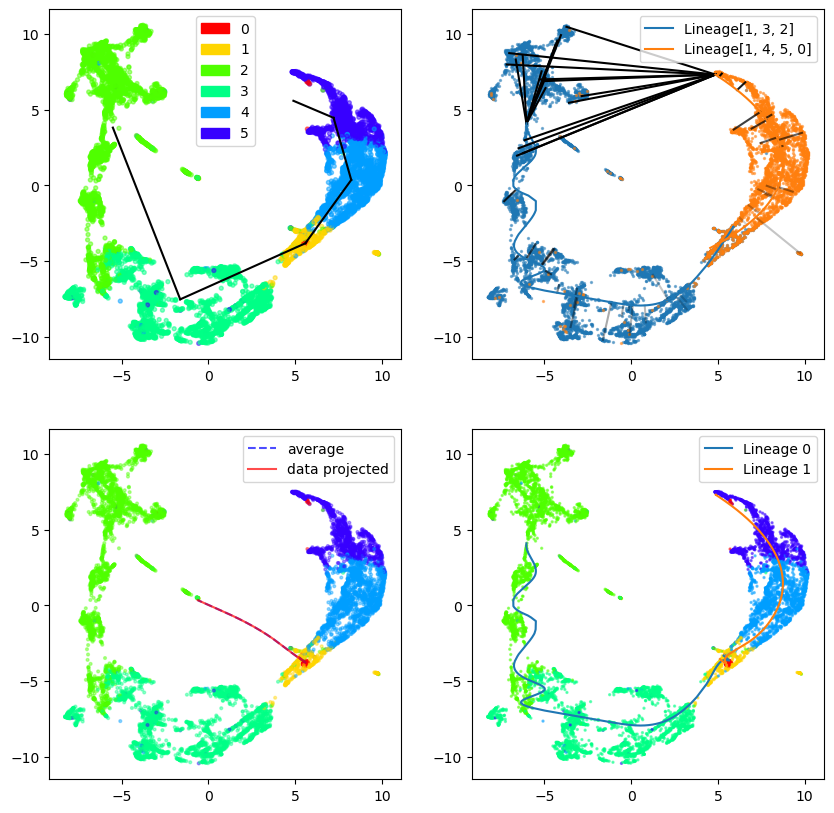

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
custom_xlim = (-12, 12)
custom_ylim = (-12, 12)
# plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)

slingshot = Slingshot(adata, celltype_key="manual_annotation_integer", 
                      obsm_key="X_umap_aligned", start_node=1, 
                      debug_level='verbose')

slingshot.fit(num_epochs=1, debug_axes=axes)

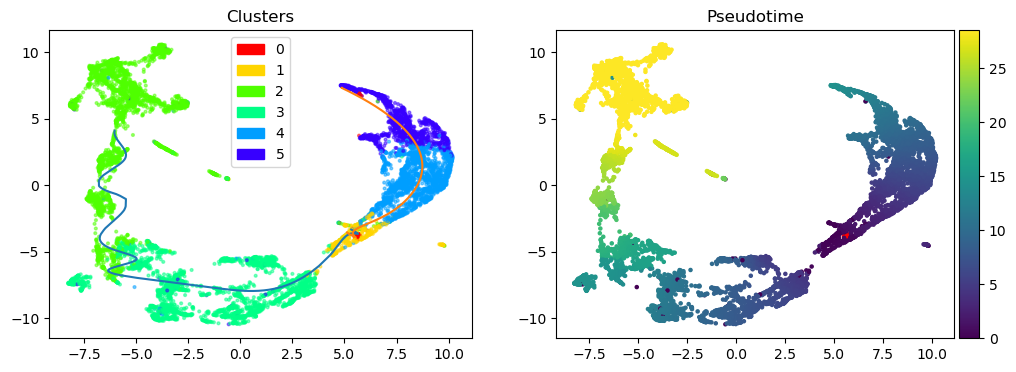

In [69]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].set_title('Clusters')
axes[1].set_title('Pseudotime')
slingshot.plotter.curves(axes[0], slingshot.curves)
slingshot.plotter.clusters(axes[0], labels=np.arange(slingshot.num_clusters), s=4, alpha=0.5)
slingshot.plotter.clusters(axes[1], color_mode='pseudotime', s=5)

### get Pseudotime

In [26]:
# NOTE: the Slingshot class has a property which has the pseudotime that is used to 
# color the plot above
pseudotime = slingshot.unified_pseudotime
pseudotime

array([ 28.66250219,   6.99793257, 305.62432148, ..., 305.62432148,
       161.04768423, 305.62432148])

In [27]:
len(pseudotime)

8237

### map the pseudotime into adata object

In [36]:
adata

AnnData object with n_obs × n_vars = 8237 × 32057
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS_enrichment', 'TSS_percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'nCount_peaks_merged', 'nFeature_peaks_merged', 'SCT_weight', 'peaks_merged_weight', 'nCount_Gene_Activity', 'nFeature_Gene_Activity', 'manual_annotation', 'manual_annotation_integer'
    var: 'features'
    uns: 'global_annotation_colors', 'manual_annotation_colors'
    obsm: 'X_umap.atac', 'X_umap.joint', 'X_umap.rna', 'X_umap_aligned'

In [37]:
adata.obs["Pseudotime"] = pseudotime

In [38]:
adata.obs.head()

orig_ident  nCount_RNA  nFeature_RNA  nCount_ATAC  \
AAACAGCCATAGACCC-1           0     12581.0          3467      51485.0   
AAACATGCAAACTCAT-1           0      5642.0          2145      19812.0   
AAACATGCAAGGACCA-1           0      2691.0           838       5182.0   
AAACATGCAAGGATTA-1           0      4233.0          1703      24072.0   
AAACATGCAGGACCTT-1           0     14247.0          3236       8685.0   

                    nFeature_ATAC  nucleosome_signal  nucleosome_percentile  \
AAACAGCCATAGACCC-1          19874           0.514213                   0.24   
AAACATGCAAACTCAT-1           9183           0.673319                   0.85   
AAACATGCAAGGACCA-1           2565           0.394904                   0.06   
AAACATGCAAGGATTA-1          10949           0.642451                   0.72   
AAACATGCAGGACCTT-1           4214           0.477004                   0.18   

                    TSS_enrichment  TSS_percentile  nCount_SCT  ...  \
AAACAGCCATAGACCC-1        5.238692            0.92      5781.0  ...   
AAACATGCAAACTCAT-1        4.409525            0.41      5363.0  ...   
AAACATGCAAGGACCA-1        4.939061            0.83      4727.0  ...   
AAACATGCAAGGATTA-1        4.636479            0.62      4729.0  ...   
AAACATGCAGGACCTT-1        4.089459            0.17      5540.0  ...   

                    nFeature_peaks_celltype nCount_peaks_merged  \
AAACAGCCATAGACCC-1                    19930             29548.0   
AAACATGCAAACTCAT-1                     9116             11621.0   
AAACATGCAAGGACCA-1                     2559              2983.0   
AAACATGCAAGGATTA-1                    10983             13992.0   
AAACATGCAGGACCTT-1                     4319              5313.0   

                    nFeature_peaks_merged  SCT_weight  peaks_merged_weight  \
AAACAGCCATAGACCC-1                  21333    0.572315             0.427685   
AAACATGCAAACTCAT-1                   9939    0.481765             0.518235   
AAACATGCAAGGACCA-1                   2761    0.408465             0.591535   
AAACATGCAAGGATTA-1                  11828    0.607841             0.392159   
AAACATGCAGGACCTT-1                   4784    0.479407             0.520593   

                    nCount_Gene_Activity  nFeature_Gene_Activity  \
AAACAGCCATAGACCC-1               26083.0                   10345   
AAACATGCAAACTCAT-1               11748.0                    6534   
AAACATGCAAGGACCA-1                3061.0                    2376   
AAACATGCAAGGATTA-1               13152.0                    7376   
AAACATGCAGGACCTT-1                5882.0                    3931   

                    manual_annotation  manual_annotation_integer  Pseudotime  
AAACAGCCATAGACCC-1   Neural_Posterior                          3   28.662502  
AAACATGCAAACTCAT-1   Neural_Posterior                          3    6.997933  
AAACATGCAAGGACCA-1    Neural_Anterior                          2  305.624321  
AAACATGCAAGGATTA-1    Neural_Anterior                          2  183.908195  
AAACATGCAGGACCTT-1                PSM                          4    5.059997  

[5 rows x 25 columns]

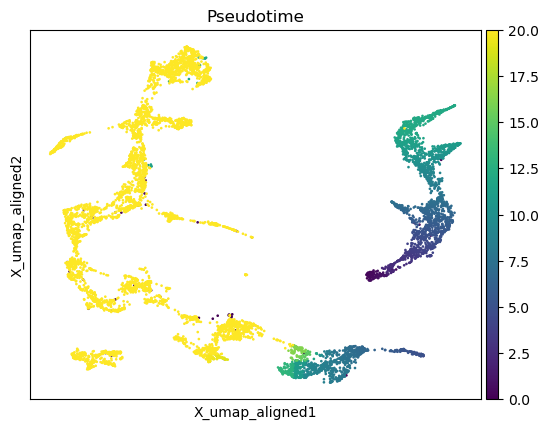

In [43]:
sc.pl.embedding(adata, basis="X_umap_aligned",
                color="Pseudotime", vmax=20)

In [49]:
# add the columns for lineages (mesoderm/neuroectoderm) - used later in CellOracle
Lineage_Meso = ["NMPs","PSM","Somites","Muscle"]
Lineage_NeuroEcto = ["NMPs", "Neural_Posterior", "Neural_Anterior"]

adata.obs["Lineage_Meso"] = adata.obs.manual_annotation.isin(Lineage_Meso)
adata.obs["Lineage_NeuroEcto"] = adata.obs.manual_annotation.isin(Lineage_NeuroEcto)

In [50]:
adata.obs["Lineage_Meso"] = adata.obs.manual_annotation.isin(Lineage_Meso)
adata.obs["Lineage_NeuroEcto"] = adata.obs.manual_annotation.isin(Lineage_NeuroEcto)

orig_ident  nCount_RNA  nFeature_RNA  nCount_ATAC  \
AAACAGCCATAGACCC-1           0     12581.0          3467      51485.0   
AAACATGCAAACTCAT-1           0      5642.0          2145      19812.0   
AAACATGCAAGGACCA-1           0      2691.0           838       5182.0   
AAACATGCAAGGATTA-1           0      4233.0          1703      24072.0   
AAACATGCAGGACCTT-1           0     14247.0          3236       8685.0   

                    nFeature_ATAC  nucleosome_signal  nucleosome_percentile  \
AAACAGCCATAGACCC-1          19874           0.514213                   0.24   
AAACATGCAAACTCAT-1           9183           0.673319                   0.85   
AAACATGCAAGGACCA-1           2565           0.394904                   0.06   
AAACATGCAAGGATTA-1          10949           0.642451                   0.72   
AAACATGCAGGACCTT-1           4214           0.477004                   0.18   

                    TSS_enrichment  TSS_percentile  nCount_SCT  ...  \
AAACAGCCATAGACCC-1        5.238692            0.92      5781.0  ...   
AAACATGCAAACTCAT-1        4.409525            0.41      5363.0  ...   
AAACATGCAAGGACCA-1        4.939061            0.83      4727.0  ...   
AAACATGCAAGGATTA-1        4.636479            0.62      4729.0  ...   
AAACATGCAGGACCTT-1        4.089459            0.17      5540.0  ...   

                    nFeature_peaks_merged SCT_weight  peaks_merged_weight  \
AAACAGCCATAGACCC-1                  21333   0.572315             0.427685   
AAACATGCAAACTCAT-1                   9939   0.481765             0.518235   
AAACATGCAAGGACCA-1                   2761   0.408465             0.591535   
AAACATGCAAGGATTA-1                  11828   0.607841             0.392159   
AAACATGCAGGACCTT-1                   4784   0.479407             0.520593   

                    nCount_Gene_Activity  nFeature_Gene_Activity  \
AAACAGCCATAGACCC-1               26083.0                   10345   
AAACATGCAAACTCAT-1               11748.0                    6534   
AAACATGCAAGGACCA-1                3061.0                    2376   
AAACATGCAAGGATTA-1               13152.0                    7376   
AAACATGCAGGACCTT-1                5882.0                    3931   

                    manual_annotation  manual_annotation_integer  Pseudotime  \
AAACAGCCATAGACCC-1   Neural_Posterior                          3   28.662502   
AAACATGCAAACTCAT-1   Neural_Posterior                          3    6.997933   
AAACATGCAAGGACCA-1    Neural_Anterior                          2  305.624321   
AAACATGCAAGGATTA-1    Neural_Anterior                          2  183.908195   
AAACATGCAGGACCTT-1                PSM                          4    5.059997   

                    Lineage_Meso  Lineage_NeuroEcto  
AAACAGCCATAGACCC-1         False               True  
AAACATGCAAACTCAT-1         False               True  
AAACATGCAAGGACCA-1         False               True  
AAACATGCAAGGATTA-1         False               True  
AAACATGCAGGACCTT-1          True              False  

[5 rows x 27 columns]

In [51]:
# Fill in Pseudotime for Lineage_Meso where Lineage_Meso is True
adata.obs['Pseudotime_Lineage_Meso'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_Meso'], np.nan)

# Fill in Pseudotime for Lineage_NeuroEcto where Lineage_NeuroEcto is True
adata.obs['Pseudotime_Lineage_NeuroEcto'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_NeuroEcto'], np.nan)

In [52]:
adata.obs.head()

orig_ident  nCount_RNA  nFeature_RNA  nCount_ATAC  \
AAACAGCCATAGACCC-1           0     12581.0          3467      51485.0   
AAACATGCAAACTCAT-1           0      5642.0          2145      19812.0   
AAACATGCAAGGACCA-1           0      2691.0           838       5182.0   
AAACATGCAAGGATTA-1           0      4233.0          1703      24072.0   
AAACATGCAGGACCTT-1           0     14247.0          3236       8685.0   

                    nFeature_ATAC  nucleosome_signal  nucleosome_percentile  \
AAACAGCCATAGACCC-1          19874           0.514213                   0.24   
AAACATGCAAACTCAT-1           9183           0.673319                   0.85   
AAACATGCAAGGACCA-1           2565           0.394904                   0.06   
AAACATGCAAGGATTA-1          10949           0.642451                   0.72   
AAACATGCAGGACCTT-1           4214           0.477004                   0.18   

                    TSS_enrichment  TSS_percentile  nCount_SCT  ...  \
AAACAGCCATAGACCC-1        5.238692            0.92      5781.0  ...   
AAACATGCAAACTCAT-1        4.409525            0.41      5363.0  ...   
AAACATGCAAGGACCA-1        4.939061            0.83      4727.0  ...   
AAACATGCAAGGATTA-1        4.636479            0.62      4729.0  ...   
AAACATGCAGGACCTT-1        4.089459            0.17      5540.0  ...   

                    peaks_merged_weight nCount_Gene_Activity  \
AAACAGCCATAGACCC-1             0.427685              26083.0   
AAACATGCAAACTCAT-1             0.518235              11748.0   
AAACATGCAAGGACCA-1             0.591535               3061.0   
AAACATGCAAGGATTA-1             0.392159              13152.0   
AAACATGCAGGACCTT-1             0.520593               5882.0   

                    nFeature_Gene_Activity  manual_annotation  \
AAACAGCCATAGACCC-1                   10345   Neural_Posterior   
AAACATGCAAACTCAT-1                    6534   Neural_Posterior   
AAACATGCAAGGACCA-1                    2376    Neural_Anterior   
AAACATGCAAGGATTA-1                    7376    Neural_Anterior   
AAACATGCAGGACCTT-1                    3931                PSM   

                    manual_annotation_integer  Pseudotime  Lineage_Meso  \
AAACAGCCATAGACCC-1                          3   28.662502         False   
AAACATGCAAACTCAT-1                          3    6.997933         False   
AAACATGCAAGGACCA-1                          2  305.624321         False   
AAACATGCAAGGATTA-1                          2  183.908195         False   
AAACATGCAGGACCTT-1                          4    5.059997          True   

                    Lineage_NeuroEcto  Pseudotime_Lineage_Meso  \
AAACAGCCATAGACCC-1               True                      NaN   
AAACATGCAAACTCAT-1               True                      NaN   
AAACATGCAAGGACCA-1               True                      NaN   
AAACATGCAAGGATTA-1               True                      NaN   
AAACATGCAGGACCTT-1              False                 5.059997   

                    Pseudotime_Lineage_NeuroEcto  
AAACAGCCATAGACCC-1                     28.662502  
AAACATGCAAACTCAT-1                      6.997933  
AAACATGCAAGGACCA-1                    305.624321  
AAACATGCAAGGATTA-1                    183.908195  
AAACATGCAGGACCTT-1                           NaN  

[5 rows x 29 columns]

In [53]:
adata.obs.to_csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/08_NMPs_subsetted/TDR118reseq_NMPs_slingshot.csv")


## [updated 5/14/2024] Revisiting TDR125reseq and TDR124reseq (20-, and 30-somites, respectively)

These timepoints were very noisy with pySlingshot, as the clusters were very coarse-grained. We'll re-run pySlingshot with fine-grained clusters.

### TDR125reseq (20-somites)

In [2]:
adata = sc.read_h5ad("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/08_NMPs_subsetted/TDR125reseq_NMPs.h5ad")
adata

AnnData object with n_obs × n_vars = 11824 × 32057
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS_enrichment', 'TSS_percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'nCount_peaks_merged', 'nFeature_peaks_merged', 'SCT_weight', 'peaks_merged_weight', 'nCount_Gene_Activity', 'nFeature_Gene_Activity', 'manual_annotation'
    var: 'features'
    uns: 'global_annotation_colors', 'manual_annotation_colors'
    obsm: 'X_umap.atac', 'X_umap.joint', 'X_umap.rna', 'X_umap_aligned'

In [30]:
import pandas as pd

clustering = pd.read_csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/08_NMPs_subsetted/annotations/20somites_manual_clustering.txt", index_col=0, sep="\t")
clustering

adata.obs["manual_clustering"] = clustering

In [31]:
categories = adata.obs['manual_clustering'].unique()

# Create a dictionary mapping each category to an integer
category_to_integer = {category: i for i, category in enumerate(categories)}

# Print the mapping to verify
print(category_to_integer)

{'Neural_Anterior2': 0, 'Neural_Anterior1': 1, 'Neural_Posterior1': 2, 'Neural_Posterior2': 3, 'Neural_Anterior3': 4, 'Neural_Posterior3': 5, 'Somites': 6, 'Muscle': 7, 'NMP+PSM': 8}


In [32]:
# Replace the categorical labels in the DataFrame with the mapped integers
adata.obs['manual_clustering_integer'] = adata.obs['manual_clustering'].map(category_to_integer)

# # Check the new column to ensure the mapping is correct
# print(adata.obs.head())

/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/util.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isint(cluster_labels[0]):


Lineages: [Lineage[8, 2, 3, 5, 1, 0, 4], Lineage[8, 6, 7]]


  0%|          | 0/1 [00:00<?, ?it/s]/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/slingshot.py:333: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D


Reversing from leaf to root
Averaging branch @8 with lineages: [0, 1] [<pcurvepy2.pcurve.PrincipalCurve object at 0x15334be8d180>, <pcurvepy2.pcurve.PrincipalCurve object at 0x153351265ea0>]
Shrinking branch @8 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x15334be8d180>, <pcurvepy2.pcurve.PrincipalCurve object at 0x153351265ea0>]


100%|██████████| 1/1 [01:38<00:00, 98.41s/it]


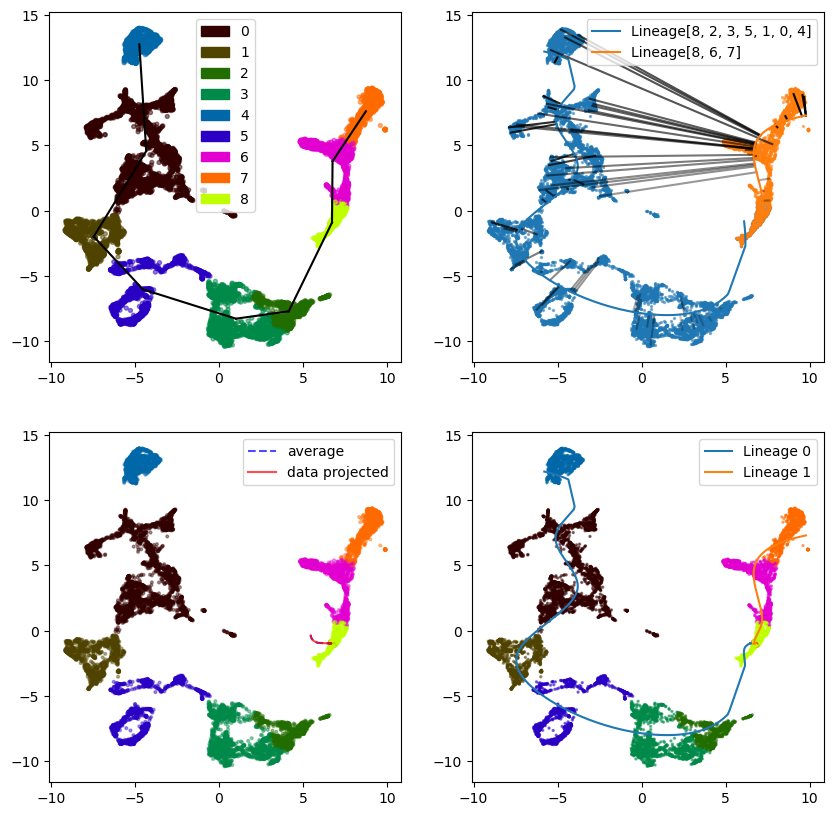

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
custom_xlim = (-12, 12)
custom_ylim = (-12, 12)
# plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)

slingshot = Slingshot(adata, celltype_key="manual_clustering_integer", 
                      obsm_key="X_umap_aligned", start_node=8,
                      debug_level='verbose')

slingshot.fit(num_epochs=1, debug_axes=axes)

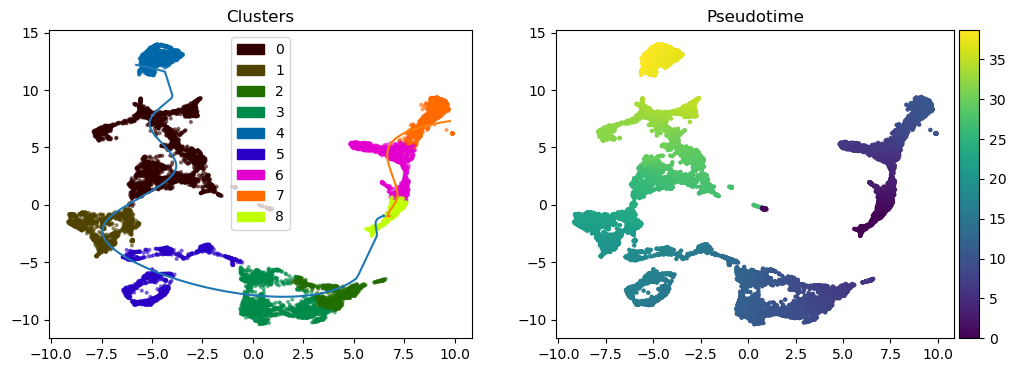

In [34]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].set_title('Clusters')
axes[1].set_title('Pseudotime')
slingshot.plotter.curves(axes[0], slingshot.curves)
slingshot.plotter.clusters(axes[0], labels=np.arange(slingshot.num_clusters), s=4, alpha=0.5)
slingshot.plotter.clusters(axes[1], color_mode='pseudotime', s=5)

### get Pseudotime

In [35]:
# NOTE: the Slingshot class has a property which has the pseudotime that is used to 
# color the plot above
pseudotime = slingshot.unified_pseudotime
pseudotime

array([27.28313783, 20.31513414, 25.90464566, ..., 37.81334509,
        2.08358321,  8.81916329])

In [36]:
len(pseudotime)

11824

### map the pseudotime into adata object

In [37]:
adata

AnnData object with n_obs × n_vars = 11824 × 32057
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS_enrichment', 'TSS_percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'nCount_peaks_merged', 'nFeature_peaks_merged', 'SCT_weight', 'peaks_merged_weight', 'nCount_Gene_Activity', 'nFeature_Gene_Activity', 'manual_annotation', 'manual_clustering', 'manual_clustering_integer'
    var: 'features'
    uns: 'global_annotation_colors', 'manual_annotation_colors'
    obsm: 'X_umap.atac', 'X_umap.joint', 'X_umap.rna', 'X_umap_aligned'

In [38]:
adata.obs["Pseudotime"] = pseudotime

In [39]:
adata.obs.head()

orig_ident  nCount_RNA  nFeature_RNA  nCount_ATAC  \
AAACAGCCAATAGTCT-1           0      4423.0          1699      55841.0   
AAACAGCCAATTGAAG-1           0      6565.0          1685      27119.0   
AAACAGCCACTGACTA-1           0      5111.0          1932      60618.0   
AAACATGCAACGTGCT-1           0      2662.0          1007      37976.0   
AAACATGCAAGTGAAC-1           0      3258.0          1096       7389.0   

                    nFeature_ATAC  nucleosome_signal  nucleosome_percentile  \
AAACAGCCAATAGTCT-1          22094           0.790918                   0.60   
AAACAGCCAATTGAAG-1          12251           0.693839                   0.19   
AAACAGCCACTGACTA-1          22694           0.730821                   0.31   
AAACATGCAACGTGCT-1          16691           0.799681                   0.64   
AAACATGCAAGTGAAC-1           3546           0.519355                   0.03   

                    TSS_enrichment  TSS_percentile  nCount_SCT  ...  \
AAACAGCCAATAGTCT-1        4.114782            0.21      4330.0  ...   
AAACAGCCAATTGAAG-1        4.899660            0.92      4772.0  ...   
AAACAGCCACTGACTA-1        4.354075            0.48      4629.0  ...   
AAACATGCAACGTGCT-1        4.471974            0.62      3775.0  ...   
AAACATGCAAGTGAAC-1        4.758877            0.85      3916.0  ...   

                    nCount_peaks_merged nFeature_peaks_merged  SCT_weight  \
AAACAGCCAATAGTCT-1              33493.0                 23843    0.396183   
AAACAGCCAATTGAAG-1              16145.0                 13149    0.037702   
AAACAGCCACTGACTA-1              35973.0                 24262    0.439445   
AAACATGCAACGTGCT-1              22753.0                 17927    0.405072   
AAACATGCAAGTGAAC-1               4215.0                  3775    0.308105   

                    peaks_merged_weight  nCount_Gene_Activity  \
AAACAGCCAATAGTCT-1             0.603817               31702.0   
AAACAGCCAATTGAAG-1             0.962298               15664.0   
AAACAGCCACTGACTA-1             0.560555               33518.0   
AAACATGCAACGTGCT-1             0.594928               20877.0   
AAACATGCAAGTGAAC-1             0.691895                3753.0   

                    nFeature_Gene_Activity  manual_annotation  \
AAACAGCCAATAGTCT-1                   11385    Neural_Anterior   
AAACAGCCAATTGAAG-1                    7948    Neural_Anterior   
AAACAGCCACTGACTA-1                   11921    Neural_Anterior   
AAACATGCAACGTGCT-1                    9524   Neural_Posterior   
AAACATGCAAGTGAAC-1                    2630    Neural_Anterior   

                    manual_clustering  manual_clustering_integer  Pseudotime  
AAACAGCCAATAGTCT-1   Neural_Anterior2                          0   27.283138  
AAACAGCCAATTGAAG-1   Neural_Anterior1                          1   20.315134  
AAACAGCCACTGACTA-1   Neural_Anterior2                          0   25.904646  
AAACATGCAACGTGCT-1  Neural_Posterior1                          2    7.290178  
AAACATGCAAGTGAAC-1   Neural_Anterior2                          0   34.027810  

[5 rows x 26 columns]

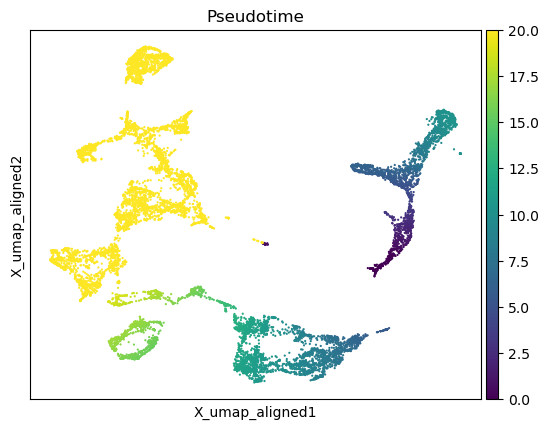

In [40]:
sc.pl.embedding(adata, basis="X_umap_aligned",
                color="Pseudotime", vmax=20)

In [41]:
# add the columns for lineages (mesoderm/neuroectoderm) - used later in CellOracle
Lineage_Meso = ["NMPs","PSM","Somites","Muscle"]
Lineage_NeuroEcto = ["NMPs", "Neural_Posterior", "Neural_Anterior"]

adata.obs["Lineage_Meso"] = adata.obs.manual_annotation.isin(Lineage_Meso)
adata.obs["Lineage_NeuroEcto"] = adata.obs.manual_annotation.isin(Lineage_NeuroEcto)

In [42]:
adata.obs["Lineage_Meso"] = adata.obs.manual_annotation.isin(Lineage_Meso)
adata.obs["Lineage_NeuroEcto"] = adata.obs.manual_annotation.isin(Lineage_NeuroEcto)

In [43]:
# Fill in Pseudotime for Lineage_Meso where Lineage_Meso is True
adata.obs['Pseudotime_Lineage_Meso'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_Meso'], np.nan)

# Fill in Pseudotime for Lineage_NeuroEcto where Lineage_NeuroEcto is True
adata.obs['Pseudotime_Lineage_NeuroEcto'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_NeuroEcto'], np.nan)

In [52]:
adata.obs.head()

orig_ident  nCount_RNA  nFeature_RNA  nCount_ATAC  \
AAACAGCCATAGACCC-1           0     12581.0          3467      51485.0   
AAACATGCAAACTCAT-1           0      5642.0          2145      19812.0   
AAACATGCAAGGACCA-1           0      2691.0           838       5182.0   
AAACATGCAAGGATTA-1           0      4233.0          1703      24072.0   
AAACATGCAGGACCTT-1           0     14247.0          3236       8685.0   

                    nFeature_ATAC  nucleosome_signal  nucleosome_percentile  \
AAACAGCCATAGACCC-1          19874           0.514213                   0.24   
AAACATGCAAACTCAT-1           9183           0.673319                   0.85   
AAACATGCAAGGACCA-1           2565           0.394904                   0.06   
AAACATGCAAGGATTA-1          10949           0.642451                   0.72   
AAACATGCAGGACCTT-1           4214           0.477004                   0.18   

                    TSS_enrichment  TSS_percentile  nCount_SCT  ...  \
AAACAGCCATAGACCC-1        5.238692            0.92      5781.0  ...   
AAACATGCAAACTCAT-1        4.409525            0.41      5363.0  ...   
AAACATGCAAGGACCA-1        4.939061            0.83      4727.0  ...   
AAACATGCAAGGATTA-1        4.636479            0.62      4729.0  ...   
AAACATGCAGGACCTT-1        4.089459            0.17      5540.0  ...   

                    peaks_merged_weight nCount_Gene_Activity  \
AAACAGCCATAGACCC-1             0.427685              26083.0   
AAACATGCAAACTCAT-1             0.518235              11748.0   
AAACATGCAAGGACCA-1             0.591535               3061.0   
AAACATGCAAGGATTA-1             0.392159              13152.0   
AAACATGCAGGACCTT-1             0.520593               5882.0   

                    nFeature_Gene_Activity  manual_annotation  \
AAACAGCCATAGACCC-1                   10345   Neural_Posterior   
AAACATGCAAACTCAT-1                    6534   Neural_Posterior   
AAACATGCAAGGACCA-1                    2376    Neural_Anterior   
AAACATGCAAGGATTA-1                    7376    Neural_Anterior   
AAACATGCAGGACCTT-1                    3931                PSM   

                    manual_annotation_integer  Pseudotime  Lineage_Meso  \
AAACAGCCATAGACCC-1                          3   28.662502         False   
AAACATGCAAACTCAT-1                          3    6.997933         False   
AAACATGCAAGGACCA-1                          2  305.624321         False   
AAACATGCAAGGATTA-1                          2  183.908195         False   
AAACATGCAGGACCTT-1                          4    5.059997          True   

                    Lineage_NeuroEcto  Pseudotime_Lineage_Meso  \
AAACAGCCATAGACCC-1               True                      NaN   
AAACATGCAAACTCAT-1               True                      NaN   
AAACATGCAAGGACCA-1               True                      NaN   
AAACATGCAAGGATTA-1               True                      NaN   
AAACATGCAGGACCTT-1              False                 5.059997   

                    Pseudotime_Lineage_NeuroEcto  
AAACAGCCATAGACCC-1                     28.662502  
AAACATGCAAACTCAT-1                      6.997933  
AAACATGCAAGGACCA-1                    305.624321  
AAACATGCAAGGATTA-1                    183.908195  
AAACATGCAGGACCTT-1                           NaN  

[5 rows x 29 columns]

In [45]:
filepath = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/08_NMPs_subsetted/"
data_id = "TDR125reseq_NMPs"

# save the adata.obs as a dataframe (csv file) for further analysis
adata.obs.to_csv(filepath + f"{data_id}_slingshot.csv")

# save the updated adata object
adata.write_h5ad(filepath + f"{data_id}_pyslingshot.h5ad")

### TDR124reseq (30-somites)

In [46]:
adata = sc.read_h5ad("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/08_NMPs_subsetted/TDR124reseq_NMPs.h5ad")
adata

AnnData object with n_obs × n_vars = 4967 × 32057
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS_enrichment', 'TSS_percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'nCount_peaks_merged', 'nFeature_peaks_merged', 'SCT_weight', 'peaks_merged_weight', 'nCount_Gene_Activity', 'nFeature_Gene_Activity', 'manual_annotation'
    var: 'features'
    uns: 'global_annotation_colors', 'manual_annotation_colors'
    obsm: 'X_umap.atac', 'X_umap.joint', 'X_umap.rna', 'X_umap_aligned'

In [153]:
# load the annotation
clustering = pd.read_csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/08_NMPs_subsetted/annotations/30somites_manual_clustering.txt", index_col=0, sep="\t")
clustering

adata.obs["manual_clustering"] = clustering

categories = adata.obs['manual_clustering'].unique()

# Create a dictionary mapping each category to an integer
category_to_integer = {category: i for i, category in enumerate(categories)}

# Print the mapping to verify
print(category_to_integer)

# Replace the categorical labels in the DataFrame with the mapped integers
adata.obs['manual_clustering_integer'] = adata.obs['manual_clustering'].map(category_to_integer)

{'Neural_Anterior1': 0, 'PSM1': 1, 'Neural_Posterior2': 2, 'Neural_Posterior1': 3, 'Neural_Posterior3': 4, 'Somites': 5, 'NMPs': 6, 'PSM2': 7, 'NMP2': 8}


/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/util.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isint(cluster_labels[0]):


Lineages: [Lineage[6, 3, 2, 4, 0], Lineage[6, 8, 1, 7, 5]]


  0%|          | 0/1 [00:00<?, ?it/s]/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/slingshot.py:333: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D


Reversing from leaf to root
Averaging branch @6 with lineages: [0, 1] [<pcurvepy2.pcurve.PrincipalCurve object at 0x15333f27a7a0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x1533406f4730>]
Shrinking branch @6 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x15333f27a7a0>, <pcurvepy2.pcurve.PrincipalCurve object at 0x1533406f4730>]


100%|██████████| 1/1 [00:17<00:00, 17.67s/it]


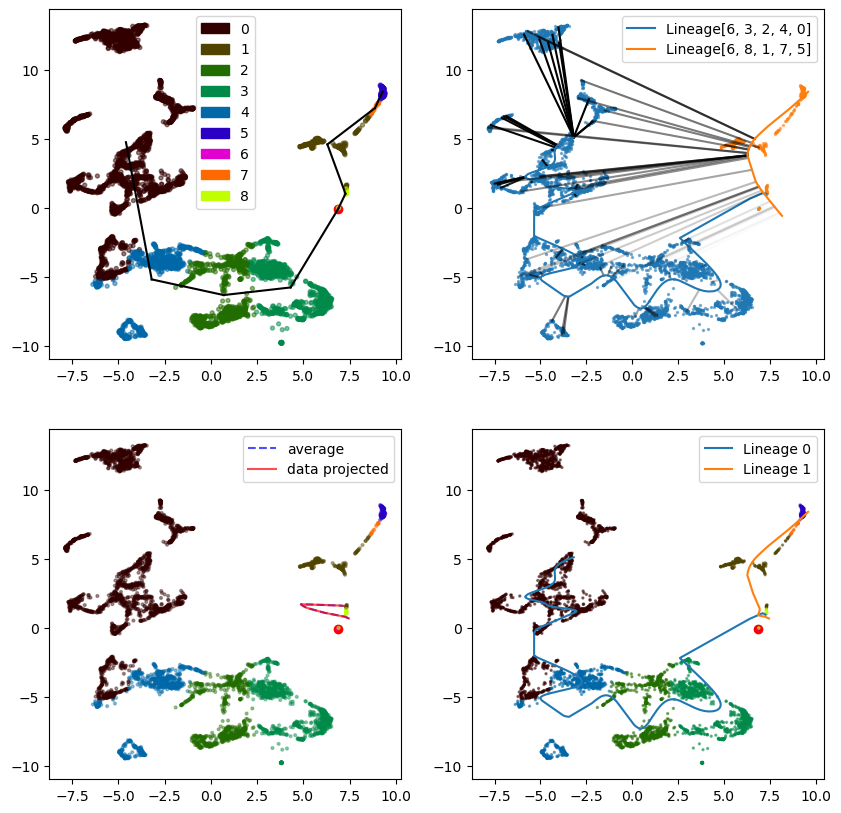

In [154]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
custom_xlim = (-12, 12)
custom_ylim = (-12, 12)
# plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)

slingshot = Slingshot(adata, celltype_key="manual_clustering_integer", 
                      obsm_key="X_umap_aligned", start_node=6, #end_nodes=[6, 2],
                      debug_level='verbose')

slingshot.fit(num_epochs=1, debug_axes=axes)
# slingshot.fit(num_epochs=1)

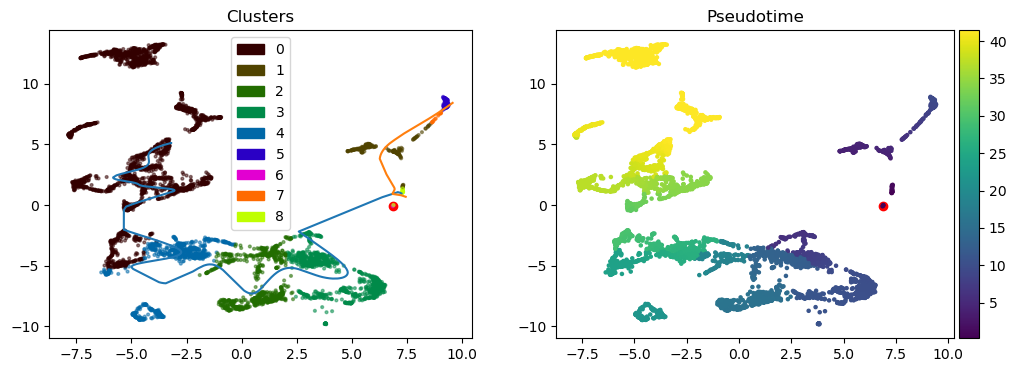

In [155]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].set_title('Clusters')
axes[1].set_title('Pseudotime')
slingshot.plotter.curves(axes[0], slingshot.curves)
slingshot.plotter.clusters(axes[0], labels=np.arange(slingshot.num_clusters), s=4, alpha=0.5)
slingshot.plotter.clusters(axes[1], color_mode='pseudotime', s=5)

### get Pseudotime

In [156]:
# NOTE: the Slingshot class has a property which has the pseudotime that is used to 
# color the plot above
pseudotime = slingshot.unified_pseudotime
pseudotime

array([29.54504177,  4.23398977, 41.44093396, ...,  7.01797761,
       10.17812905, 15.19377112])

In [157]:
len(pseudotime)

4967

### map the pseudotime into adata object

In [158]:
adata

AnnData object with n_obs × n_vars = 4967 × 32057
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS_enrichment', 'TSS_percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'nCount_peaks_merged', 'nFeature_peaks_merged', 'SCT_weight', 'peaks_merged_weight', 'nCount_Gene_Activity', 'nFeature_Gene_Activity', 'manual_annotation', 'manual_clustering', 'manual_clustering_integer'
    var: 'features'
    uns: 'global_annotation_colors', 'manual_annotation_colors'
    obsm: 'X_umap.atac', 'X_umap.joint', 'X_umap.rna', 'X_umap_aligned'

In [159]:
adata.obs["Pseudotime"] = pseudotime

In [160]:
adata.obs.head()

orig_ident  nCount_RNA  nFeature_RNA  nCount_ATAC  \
AAACAGCCAAGGCCAA-1           0      2467.0           864      15766.0   
AAACAGCCAATATAGG-1           0      2364.0           737       9083.0   
AAACAGCCACCTAATG-1           0      2766.0           943      12016.0   
AAACAGCCAGCATGAG-1           0      2975.0           900      11517.0   
AAACAGCCATTGACAT-1           0      3780.0          1151      16791.0   

                    nFeature_ATAC  nucleosome_signal  nucleosome_percentile  \
AAACAGCCAAGGCCAA-1           7150           0.537764                   0.47   
AAACAGCCAATATAGG-1           4331           0.428235                   0.10   
AAACAGCCACCTAATG-1           5578           0.511070                   0.36   
AAACAGCCAGCATGAG-1           5219           0.494208                   0.28   
AAACAGCCATTGACAT-1           7525           0.554734                   0.54   

                    TSS_enrichment  TSS_percentile  nCount_SCT  ...  \
AAACAGCCAAGGCCAA-1        5.046018            0.78      3141.0  ...   
AAACAGCCAATATAGG-1        5.856213            0.97      3137.0  ...   
AAACAGCCACCTAATG-1        4.754370            0.59      3212.0  ...   
AAACAGCCAGCATGAG-1        4.238098            0.19      3275.0  ...   
AAACAGCCATTGACAT-1        4.178932            0.16      3556.0  ...   

                    nCount_peaks_merged nFeature_peaks_merged  SCT_weight  \
AAACAGCCAAGGCCAA-1               9380.0                  7805    0.415370   
AAACAGCCAATATAGG-1               5484.0                  4830    0.161655   
AAACAGCCACCTAATG-1               7086.0                  6061    0.500000   
AAACAGCCAGCATGAG-1               6750.0                  5709    0.389287   
AAACAGCCATTGACAT-1               9875.0                  8161    0.199586   

                    peaks_merged_weight  nCount_Gene_Activity  \
AAACAGCCAAGGCCAA-1             0.584630                9555.0   
AAACAGCCAATATAGG-1             0.838345                5756.0   
AAACAGCCACCTAATG-1             0.500000                6866.0   
AAACAGCCAGCATGAG-1             0.610713                6644.0   
AAACAGCCATTGACAT-1             0.800414                9878.0   

                    nFeature_Gene_Activity  manual_annotation  \
AAACAGCCAAGGCCAA-1                    5453    Neural_Anterior   
AAACAGCCAATATAGG-1                    3747            Somites   
AAACAGCCACCTAATG-1                    4291    Neural_Anterior   
AAACAGCCAGCATGAG-1                    4128   Neural_Posterior   
AAACAGCCATTGACAT-1                    5545   Neural_Posterior   

                    manual_clustering  manual_clustering_integer  Pseudotime  
AAACAGCCAAGGCCAA-1   Neural_Anterior1                          0   29.545042  
AAACAGCCAATATAGG-1               PSM1                          1    4.233990  
AAACAGCCACCTAATG-1   Neural_Anterior1                          0   41.440934  
AAACAGCCAGCATGAG-1  Neural_Posterior2                          2   15.919587  
AAACAGCCATTGACAT-1  Neural_Posterior1                          3    8.216425  

[5 rows x 26 columns]

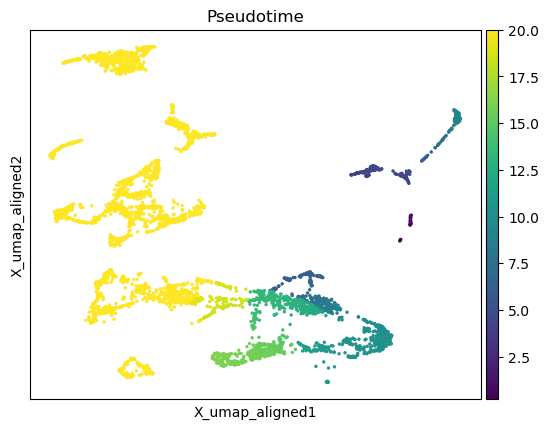

In [161]:
sc.pl.embedding(adata, basis="X_umap_aligned",
                color="Pseudotime", vmax=20)

In [163]:
# add the columns for lineages (mesoderm/neuroectoderm) - used later in CellOracle
Lineage_Meso = ["NMPs","PSM","Somites","Muscle"]
Lineage_NeuroEcto = ["NMPs", "Neural_Posterior", "Neural_Anterior"]

adata.obs["Lineage_Meso"] = adata.obs.manual_annotation.isin(Lineage_Meso)
adata.obs["Lineage_NeuroEcto"] = adata.obs.manual_annotation.isin(Lineage_NeuroEcto)

In [164]:
adata.obs["Lineage_Meso"] = adata.obs.manual_annotation.isin(Lineage_Meso)
adata.obs["Lineage_NeuroEcto"] = adata.obs.manual_annotation.isin(Lineage_NeuroEcto)

In [165]:
# Fill in Pseudotime for Lineage_Meso where Lineage_Meso is True
adata.obs['Pseudotime_Lineage_Meso'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_Meso'], np.nan)

# Fill in Pseudotime for Lineage_NeuroEcto where Lineage_NeuroEcto is True
adata.obs['Pseudotime_Lineage_NeuroEcto'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_NeuroEcto'], np.nan)

In [52]:
adata.obs.head()

orig_ident  nCount_RNA  nFeature_RNA  nCount_ATAC  \
AAACAGCCATAGACCC-1           0     12581.0          3467      51485.0   
AAACATGCAAACTCAT-1           0      5642.0          2145      19812.0   
AAACATGCAAGGACCA-1           0      2691.0           838       5182.0   
AAACATGCAAGGATTA-1           0      4233.0          1703      24072.0   
AAACATGCAGGACCTT-1           0     14247.0          3236       8685.0   

                    nFeature_ATAC  nucleosome_signal  nucleosome_percentile  \
AAACAGCCATAGACCC-1          19874           0.514213                   0.24   
AAACATGCAAACTCAT-1           9183           0.673319                   0.85   
AAACATGCAAGGACCA-1           2565           0.394904                   0.06   
AAACATGCAAGGATTA-1          10949           0.642451                   0.72   
AAACATGCAGGACCTT-1           4214           0.477004                   0.18   

                    TSS_enrichment  TSS_percentile  nCount_SCT  ...  \
AAACAGCCATAGACCC-1        5.238692            0.92      5781.0  ...   
AAACATGCAAACTCAT-1        4.409525            0.41      5363.0  ...   
AAACATGCAAGGACCA-1        4.939061            0.83      4727.0  ...   
AAACATGCAAGGATTA-1        4.636479            0.62      4729.0  ...   
AAACATGCAGGACCTT-1        4.089459            0.17      5540.0  ...   

                    peaks_merged_weight nCount_Gene_Activity  \
AAACAGCCATAGACCC-1             0.427685              26083.0   
AAACATGCAAACTCAT-1             0.518235              11748.0   
AAACATGCAAGGACCA-1             0.591535               3061.0   
AAACATGCAAGGATTA-1             0.392159              13152.0   
AAACATGCAGGACCTT-1             0.520593               5882.0   

                    nFeature_Gene_Activity  manual_annotation  \
AAACAGCCATAGACCC-1                   10345   Neural_Posterior   
AAACATGCAAACTCAT-1                    6534   Neural_Posterior   
AAACATGCAAGGACCA-1                    2376    Neural_Anterior   
AAACATGCAAGGATTA-1                    7376    Neural_Anterior   
AAACATGCAGGACCTT-1                    3931                PSM   

                    manual_annotation_integer  Pseudotime  Lineage_Meso  \
AAACAGCCATAGACCC-1                          3   28.662502         False   
AAACATGCAAACTCAT-1                          3    6.997933         False   
AAACATGCAAGGACCA-1                          2  305.624321         False   
AAACATGCAAGGATTA-1                          2  183.908195         False   
AAACATGCAGGACCTT-1                          4    5.059997          True   

                    Lineage_NeuroEcto  Pseudotime_Lineage_Meso  \
AAACAGCCATAGACCC-1               True                      NaN   
AAACATGCAAACTCAT-1               True                      NaN   
AAACATGCAAGGACCA-1               True                      NaN   
AAACATGCAAGGATTA-1               True                      NaN   
AAACATGCAGGACCTT-1              False                 5.059997   

                    Pseudotime_Lineage_NeuroEcto  
AAACAGCCATAGACCC-1                     28.662502  
AAACATGCAAACTCAT-1                      6.997933  
AAACATGCAAGGACCA-1                    305.624321  
AAACATGCAAGGATTA-1                    183.908195  
AAACATGCAGGACCTT-1                           NaN  

[5 rows x 29 columns]

In [166]:
filepath = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/08_NMPs_subsetted/"
data_id = "TDR124reseq_NMPs"

# save the adata.obs as a dataframe (csv file) for further analysis
adata.obs.to_csv(filepath + f"{data_id}_slingshot.csv")

# save the updated adata object
adata.write_h5ad(filepath + f"{data_id}_pyslingshot.h5ad")

### TDR118reseq (15-somites)

In [167]:
adata = sc.read_h5ad("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/08_NMPs_subsetted/TDR118reseq_NMPs_pyslingshot.h5ad")
adata

AnnData object with n_obs × n_vars = 8237 × 32057
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS_enrichment', 'TSS_percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'nCount_peaks_merged', 'nFeature_peaks_merged', 'SCT_weight', 'peaks_merged_weight', 'nCount_Gene_Activity', 'nFeature_Gene_Activity', 'manual_annotation'
    var: 'features'
    uns: 'global_annotation_colors', 'manual_annotation_colors'
    obsm: 'X_umap.atac', 'X_umap.joint', 'X_umap.rna', 'X_umap_aligned'

In [177]:
import pandas as pd

clustering = pd.read_csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/08_NMPs_subsetted/annotations/15somites_manual_clustering.txt", index_col=0, sep="\t")
clustering

adata.obs["manual_clustering"] = clustering

categories = adata.obs['manual_clustering'].unique()

# Create a dictionary mapping each category to an integer
category_to_integer = {category: i for i, category in enumerate(categories)}

# Print the mapping to verify
print(category_to_integer)

# Replace the categorical labels in the DataFrame with the mapped integers
adata.obs['manual_clustering_integer'] = adata.obs['manual_clustering'].map(category_to_integer)

{'NP3': 0, 'NP1': 1, 'Neural_Anterior': 2, 'PSM': 3, 'NP4': 4, 'NP2': 5, 'Muscle': 6, 'Somites': 7, 'NMPs': 8}


/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/util.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isint(cluster_labels[0]):


Lineages: [Lineage[8, 1, 5, 0, 4, 2], Lineage[8, 3, 7, 6]]


  0%|          | 0/1 [00:00<?, ?it/s]/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/pyslingshot/slingshot.py:333: RuntimeWarning: invalid value encountered in divide
  cell_weights = z_prime / np.nanmax(z_prime, axis=1, keepdims=True) #rowMins(D) / D


Reversing from leaf to root
Averaging branch @8 with lineages: [0, 1] [<pcurvepy2.pcurve.PrincipalCurve object at 0x15334832cc10>, <pcurvepy2.pcurve.PrincipalCurve object at 0x153348880b20>]
Shrinking branch @8 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x15334832cc10>, <pcurvepy2.pcurve.PrincipalCurve object at 0x153348880b20>]


100%|██████████| 1/1 [00:46<00:00, 46.61s/it]


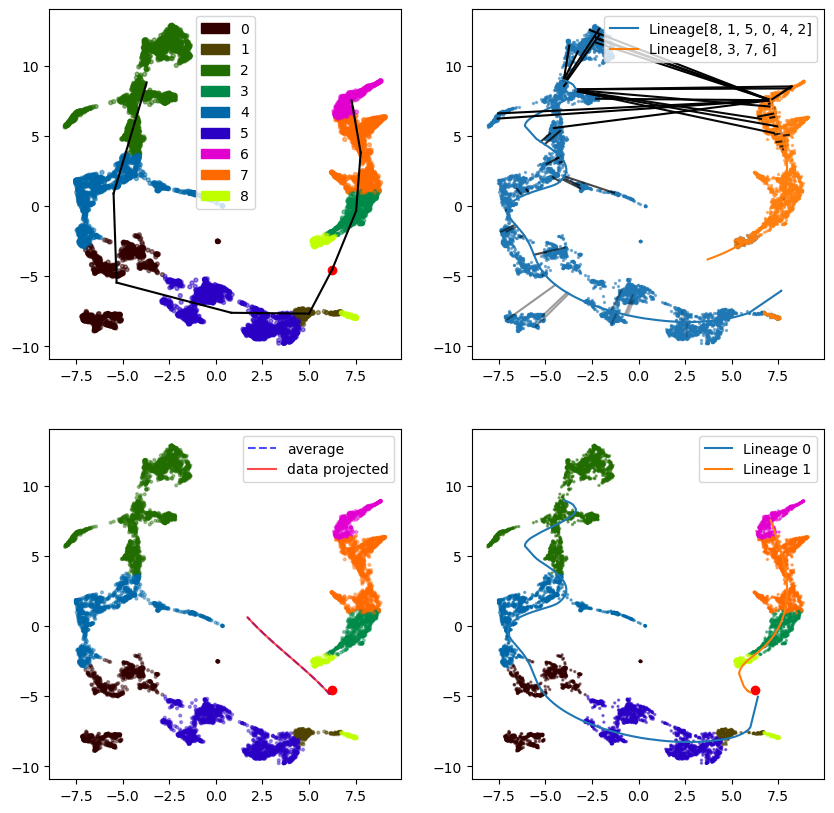

In [178]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
custom_xlim = (-12, 12)
custom_ylim = (-12, 12)
# plt.setp(axes, xlim=custom_xlim, ylim=custom_ylim)

slingshot = Slingshot(adata, celltype_key="manual_clustering_integer", 
                      obsm_key="X_umap_aligned", start_node=8,
                      debug_level='verbose')

slingshot.fit(num_epochs=1, debug_axes=axes)

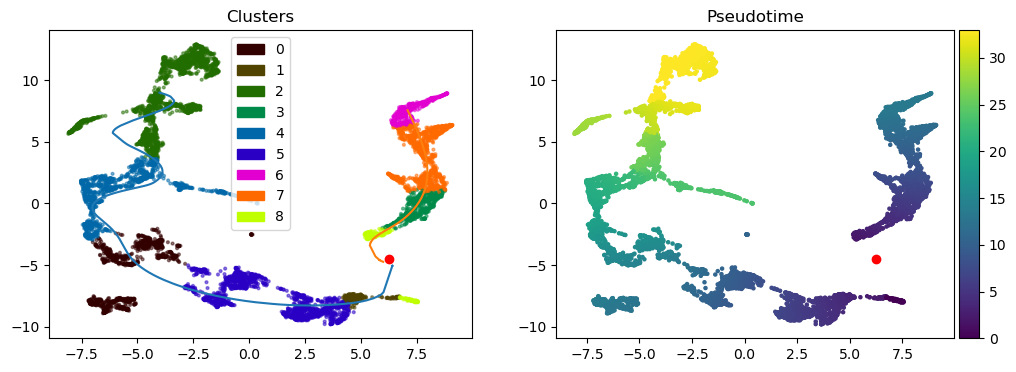

In [179]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].set_title('Clusters')
axes[1].set_title('Pseudotime')
slingshot.plotter.curves(axes[0], slingshot.curves)
slingshot.plotter.clusters(axes[0], labels=np.arange(slingshot.num_clusters), s=4, alpha=0.5)
slingshot.plotter.clusters(axes[1], color_mode='pseudotime', s=5)

### get Pseudotime

In [180]:
# NOTE: the Slingshot class has a property which has the pseudotime that is used to 
# color the plot above
pseudotime = slingshot.unified_pseudotime
pseudotime

array([13.07497818,  3.64123574, 30.45481672, ..., 32.74553268,
       14.62644764, 32.94309748])

In [181]:
len(pseudotime)

8237

### map the pseudotime into adata object

In [182]:
adata

AnnData object with n_obs × n_vars = 8237 × 32057
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS_enrichment', 'TSS_percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'nCount_peaks_merged', 'nFeature_peaks_merged', 'SCT_weight', 'peaks_merged_weight', 'nCount_Gene_Activity', 'nFeature_Gene_Activity', 'manual_annotation', 'manual_clustering', 'manual_clustering_integer'
    var: 'features'
    uns: 'global_annotation_colors', 'manual_annotation_colors'
    obsm: 'X_umap.atac', 'X_umap.joint', 'X_umap.rna', 'X_umap_aligned'

In [183]:
adata.obs["Pseudotime"] = pseudotime

In [39]:
adata.obs.head()

orig_ident  nCount_RNA  nFeature_RNA  nCount_ATAC  \
AAACAGCCAATAGTCT-1           0      4423.0          1699      55841.0   
AAACAGCCAATTGAAG-1           0      6565.0          1685      27119.0   
AAACAGCCACTGACTA-1           0      5111.0          1932      60618.0   
AAACATGCAACGTGCT-1           0      2662.0          1007      37976.0   
AAACATGCAAGTGAAC-1           0      3258.0          1096       7389.0   

                    nFeature_ATAC  nucleosome_signal  nucleosome_percentile  \
AAACAGCCAATAGTCT-1          22094           0.790918                   0.60   
AAACAGCCAATTGAAG-1          12251           0.693839                   0.19   
AAACAGCCACTGACTA-1          22694           0.730821                   0.31   
AAACATGCAACGTGCT-1          16691           0.799681                   0.64   
AAACATGCAAGTGAAC-1           3546           0.519355                   0.03   

                    TSS_enrichment  TSS_percentile  nCount_SCT  ...  \
AAACAGCCAATAGTCT-1        4.114782            0.21      4330.0  ...   
AAACAGCCAATTGAAG-1        4.899660            0.92      4772.0  ...   
AAACAGCCACTGACTA-1        4.354075            0.48      4629.0  ...   
AAACATGCAACGTGCT-1        4.471974            0.62      3775.0  ...   
AAACATGCAAGTGAAC-1        4.758877            0.85      3916.0  ...   

                    nCount_peaks_merged nFeature_peaks_merged  SCT_weight  \
AAACAGCCAATAGTCT-1              33493.0                 23843    0.396183   
AAACAGCCAATTGAAG-1              16145.0                 13149    0.037702   
AAACAGCCACTGACTA-1              35973.0                 24262    0.439445   
AAACATGCAACGTGCT-1              22753.0                 17927    0.405072   
AAACATGCAAGTGAAC-1               4215.0                  3775    0.308105   

                    peaks_merged_weight  nCount_Gene_Activity  \
AAACAGCCAATAGTCT-1             0.603817               31702.0   
AAACAGCCAATTGAAG-1             0.962298               15664.0   
AAACAGCCACTGACTA-1             0.560555               33518.0   
AAACATGCAACGTGCT-1             0.594928               20877.0   
AAACATGCAAGTGAAC-1             0.691895                3753.0   

                    nFeature_Gene_Activity  manual_annotation  \
AAACAGCCAATAGTCT-1                   11385    Neural_Anterior   
AAACAGCCAATTGAAG-1                    7948    Neural_Anterior   
AAACAGCCACTGACTA-1                   11921    Neural_Anterior   
AAACATGCAACGTGCT-1                    9524   Neural_Posterior   
AAACATGCAAGTGAAC-1                    2630    Neural_Anterior   

                    manual_clustering  manual_clustering_integer  Pseudotime  
AAACAGCCAATAGTCT-1   Neural_Anterior2                          0   27.283138  
AAACAGCCAATTGAAG-1   Neural_Anterior1                          1   20.315134  
AAACAGCCACTGACTA-1   Neural_Anterior2                          0   25.904646  
AAACATGCAACGTGCT-1  Neural_Posterior1                          2    7.290178  
AAACATGCAAGTGAAC-1   Neural_Anterior2                          0   34.027810  

[5 rows x 26 columns]

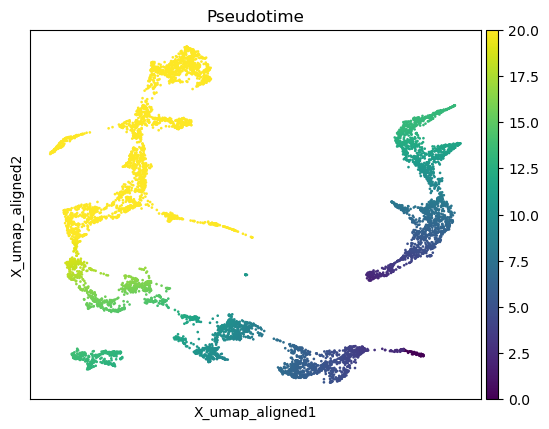

In [184]:
sc.pl.embedding(adata, basis="X_umap_aligned",
                color="Pseudotime", vmax=20)

In [185]:
# add the columns for lineages (mesoderm/neuroectoderm) - used later in CellOracle
Lineage_Meso = ["NMPs","PSM","Somites","Muscle"]
Lineage_NeuroEcto = ["NMPs", "Neural_Posterior", "Neural_Anterior"]

adata.obs["Lineage_Meso"] = adata.obs.manual_annotation.isin(Lineage_Meso)
adata.obs["Lineage_NeuroEcto"] = adata.obs.manual_annotation.isin(Lineage_NeuroEcto)

In [186]:
adata.obs["Lineage_Meso"] = adata.obs.manual_annotation.isin(Lineage_Meso)
adata.obs["Lineage_NeuroEcto"] = adata.obs.manual_annotation.isin(Lineage_NeuroEcto)

In [187]:
# Fill in Pseudotime for Lineage_Meso where Lineage_Meso is True
adata.obs['Pseudotime_Lineage_Meso'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_Meso'], np.nan)

# Fill in Pseudotime for Lineage_NeuroEcto where Lineage_NeuroEcto is True
adata.obs['Pseudotime_Lineage_NeuroEcto'] = adata.obs['Pseudotime'].where(adata.obs['Lineage_NeuroEcto'], np.nan)

In [52]:
adata.obs.head()

orig_ident  nCount_RNA  nFeature_RNA  nCount_ATAC  \
AAACAGCCATAGACCC-1           0     12581.0          3467      51485.0   
AAACATGCAAACTCAT-1           0      5642.0          2145      19812.0   
AAACATGCAAGGACCA-1           0      2691.0           838       5182.0   
AAACATGCAAGGATTA-1           0      4233.0          1703      24072.0   
AAACATGCAGGACCTT-1           0     14247.0          3236       8685.0   

                    nFeature_ATAC  nucleosome_signal  nucleosome_percentile  \
AAACAGCCATAGACCC-1          19874           0.514213                   0.24   
AAACATGCAAACTCAT-1           9183           0.673319                   0.85   
AAACATGCAAGGACCA-1           2565           0.394904                   0.06   
AAACATGCAAGGATTA-1          10949           0.642451                   0.72   
AAACATGCAGGACCTT-1           4214           0.477004                   0.18   

                    TSS_enrichment  TSS_percentile  nCount_SCT  ...  \
AAACAGCCATAGACCC-1        5.238692            0.92      5781.0  ...   
AAACATGCAAACTCAT-1        4.409525            0.41      5363.0  ...   
AAACATGCAAGGACCA-1        4.939061            0.83      4727.0  ...   
AAACATGCAAGGATTA-1        4.636479            0.62      4729.0  ...   
AAACATGCAGGACCTT-1        4.089459            0.17      5540.0  ...   

                    peaks_merged_weight nCount_Gene_Activity  \
AAACAGCCATAGACCC-1             0.427685              26083.0   
AAACATGCAAACTCAT-1             0.518235              11748.0   
AAACATGCAAGGACCA-1             0.591535               3061.0   
AAACATGCAAGGATTA-1             0.392159              13152.0   
AAACATGCAGGACCTT-1             0.520593               5882.0   

                    nFeature_Gene_Activity  manual_annotation  \
AAACAGCCATAGACCC-1                   10345   Neural_Posterior   
AAACATGCAAACTCAT-1                    6534   Neural_Posterior   
AAACATGCAAGGACCA-1                    2376    Neural_Anterior   
AAACATGCAAGGATTA-1                    7376    Neural_Anterior   
AAACATGCAGGACCTT-1                    3931                PSM   

                    manual_annotation_integer  Pseudotime  Lineage_Meso  \
AAACAGCCATAGACCC-1                          3   28.662502         False   
AAACATGCAAACTCAT-1                          3    6.997933         False   
AAACATGCAAGGACCA-1                          2  305.624321         False   
AAACATGCAAGGATTA-1                          2  183.908195         False   
AAACATGCAGGACCTT-1                          4    5.059997          True   

                    Lineage_NeuroEcto  Pseudotime_Lineage_Meso  \
AAACAGCCATAGACCC-1               True                      NaN   
AAACATGCAAACTCAT-1               True                      NaN   
AAACATGCAAGGACCA-1               True                      NaN   
AAACATGCAAGGATTA-1               True                      NaN   
AAACATGCAGGACCTT-1              False                 5.059997   

                    Pseudotime_Lineage_NeuroEcto  
AAACAGCCATAGACCC-1                     28.662502  
AAACATGCAAACTCAT-1                      6.997933  
AAACATGCAAGGACCA-1                    305.624321  
AAACATGCAAGGATTA-1                    183.908195  
AAACATGCAGGACCTT-1                           NaN  

[5 rows x 29 columns]

In [188]:
filepath = "/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/08_NMPs_subsetted/"
data_id = "TDR118reseq_NMPs"

# save the adata.obs as a dataframe (csv file) for further analysis
adata.obs.to_csv(filepath + f"{data_id}_slingshot.csv")

# save the updated adata object
adata.write_h5ad(filepath + f"{data_id}_pyslingshot.h5ad")